In [4]:
from matplotlib import rc, font_manager as fm

# 나눔고딕 폰트 경로 설정
font_location = 'data/나눔고딕/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()

# 폰트 설정
rc('font', family=font_name)

# 피처 엔지니어링 !

In [2]:
!pip install lightgbm==3.3.2
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [3]:
import lightgbm
lightgbm.__version__

'3.3.2'

In [5]:
import lightgbm as lgb
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [5]:
"""

temp_df = pd.read_csv('data/인코딩_완료_230914.csv')

# "상권_분류_코드_명"이 "골목상권"인 행만 추출
split_df1 = temp_df[temp_df['상권_구분_코드_명'] == '골목상권']

# 추출한 데이터프레임을 저장 (예시: CSV 파일로 저장)
split_df1.to_csv('골목상권_데이터230914.csv', index=False, encoding = 'utf-8 sig')

"""

'\n\ntemp_df = pd.read_csv(\'data/인코딩_완료_230914.csv\')\n\n# "상권_분류_코드_명"이 "골목상권"인 행만 추출\nsplit_df1 = temp_df[temp_df[\'상권_구분_코드_명\'] == \'골목상권\']\n\n# 추출한 데이터프레임을 저장 (예시: CSV 파일로 저장)\nsplit_df1.to_csv(\'골목상권_데이터230914.csv\', index=False, encoding = \'utf-8 sig\')\n\n'

In [6]:
"""

# "상권_분류_코드_명"이 "골목상권"인 행만 추출
split_df2 = temp_df[temp_df['상권_구분_코드_명'] != '골목상권']
split_df2 = split_df2.drop(["배후지_아파트_단지_수", 
                    "배후지_아파트_가격_1_억_미만_세대_수", 
                    "배후지_아파트_가격_1_억_세대_수", 
                    "배후지_아파트_가격_2_억_세대_수", 
                    "배후지_아파트_가격_3_억_세대_수", 
                    "배후지_아파트_가격_4_억_세대_수", 
                    "배후지_아파트_가격_5_억_세대_수", 
                    "배후지_아파트_가격_6_억_이상_세대_수"], axis=1)
# 추출한 데이터프레임을 저장 (예시: CSV 파일로 저장)
split_df2.to_csv('!=골목상권_데이터230914.csv', index=False, encoding = 'utf-8 sig')

"""

'\n\n# "상권_분류_코드_명"이 "골목상권"인 행만 추출\nsplit_df2 = temp_df[temp_df[\'상권_구분_코드_명\'] != \'골목상권\']\nsplit_df2 = split_df2.drop(["배후지_아파트_단지_수", \n                    "배후지_아파트_가격_1_억_미만_세대_수", \n                    "배후지_아파트_가격_1_억_세대_수", \n                    "배후지_아파트_가격_2_억_세대_수", \n                    "배후지_아파트_가격_3_억_세대_수", \n                    "배후지_아파트_가격_4_억_세대_수", \n                    "배후지_아파트_가격_5_억_세대_수", \n                    "배후지_아파트_가격_6_억_이상_세대_수"], axis=1)\n# 추출한 데이터프레임을 저장 (예시: CSV 파일로 저장)\nsplit_df2.to_csv(\'!=골목상권_데이터230914.csv\', index=False, encoding = \'utf-8 sig\')\n\n'

## 코드(=잠정 확정) 사용

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 151819	training's l2: 2.30489e+10	valid_1's rmse: 139936	valid_1's l2: 1.95821e+10
[2]	training's rmse: 147280	training's l2: 2.16915e+10	valid_1's rmse: 135819	valid_1's l2: 1.84469e+10
[3]	training's rmse: 142948	training's l2: 2.04342e+10	valid_1's rmse: 131917	valid_1's l2: 1.74022e+10
[4]	training's rmse: 138900	training's l2: 1.92932e+10	valid_1's rmse: 128328	valid_1's l2: 1.64681e+10
[5]	training's rmse: 135019	training's l2: 1.82301e+10	valid_1's rmse: 124946	valid_1's l2: 1.56116e+10
[6]	training's rmse: 131330	training's l2: 1.72475e+10	valid_1's rmse: 121736	valid_1's l2: 1.48196e+10
[7]	training's rmse: 127838	training's l2: 1.63427e+10	valid_1's rmse: 118573	valid_1's l2: 1.40595e+10
[8]	training's rmse: 124481	training's l2: 1.54956e+10	valid_1's rmse: 115710

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 141890	training's l2: 2.01328e+10	valid_1's rmse: 174312	valid_1's l2: 3.03845e+10
[2]	training's rmse: 136816	training's l2: 1.87185e+10	valid_1's rmse: 168824	valid_1's l2: 2.85015e+10
[3]	training's rmse: 131997	training's l2: 1.74233e+10	valid_1's rmse: 163540	valid_1's l2: 2.67453e+10
[4]	training's rmse: 127484	training's l2: 1.62521e+10	valid_1's rmse: 158537	valid_1's l2: 2.51341e+10
[5]	training's rmse: 123202	training's l2: 1.51787e+10	valid_1's rmse: 153840	valid_1's l2: 2.36667e+10
[6]	training's rmse: 118965	training's l2: 1.41526e+10	valid_1's rmse: 149482	valid_1's l2: 2.23449e+10
[7]	training's rmse: 114994	training's l2: 1.32237e+10	valid_1's rmse: 145379	valid_1's l2: 2.11351e+10
[8]	training's rmse: 111195	training's l2: 1.23644e+10	valid_1's rmse: 141533

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 146703	training's l2: 2.15218e+10	valid_1's rmse: 161107	valid_1's l2: 2.59556e+10
[2]	training's rmse: 142491	training's l2: 2.03036e+10	valid_1's rmse: 156978	valid_1's l2: 2.4642e+10
[3]	training's rmse: 138493	training's l2: 1.91802e+10	valid_1's rmse: 153092	valid_1's l2: 2.34371e+10
[4]	training's rmse: 134553	training's l2: 1.81044e+10	valid_1's rmse: 149592	valid_1's l2: 2.23778e+10
[5]	training's rmse: 130862	training's l2: 1.71248e+10	valid_1's rmse: 146071	valid_1's l2: 2.13366e+10
[6]	training's rmse: 127470	training's l2: 1.62487e+10	valid_1's rmse: 142761	valid_1's l2: 2.03808e+10
[7]	training's rmse: 123977	training's l2: 1.53704e+10	valid_1's rmse: 139896	valid_1's l2: 1.95708e+10
[8]	training's rmse: 120626	training's l2: 1.45506e+10	valid_1's rmse: 136943	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 152631	training's l2: 2.32963e+10	valid_1's rmse: 130289	valid_1's l2: 1.69752e+10
[2]	training's rmse: 146795	training's l2: 2.15488e+10	valid_1's rmse: 125254	valid_1's l2: 1.56885e+10
[3]	training's rmse: 141243	training's l2: 1.99495e+10	valid_1's rmse: 120511	valid_1's l2: 1.45228e+10
[4]	training's rmse: 136029	training's l2: 1.85038e+10	valid_1's rmse: 116024	valid_1's l2: 1.34616e+10
[5]	training's rmse: 131241	training's l2: 1.72242e+10	valid_1's rmse: 111990	valid_1's l2: 1.25417e+10
[6]	training's rmse: 126667	training's l2: 1.60445e+10	valid_1's rmse: 107970	valid_1's l2: 1.16576e+10
[7]	training's rmse: 122448	training's l2: 1.49936e+10	valid_1's rmse: 104427	valid_1's l2: 1.0905e+10
[8]	training's rmse: 118390	training's l2: 1.40162e+10	valid_1's rmse: 100937	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 152289	training's l2: 2.31921e+10	valid_1's rmse: 137893	valid_1's l2: 1.90144e+10
[2]	training's rmse: 147781	training's l2: 2.18392e+10	valid_1's rmse: 134004	valid_1's l2: 1.7957e+10
[3]	training's rmse: 143460	training's l2: 2.05809e+10	valid_1's rmse: 130175	valid_1's l2: 1.69456e+10
[4]	training's rmse: 139409	training's l2: 1.94349e+10	valid_1's rmse: 126699	valid_1's l2: 1.60525e+10
[5]	training's rmse: 135553	training's l2: 1.83745e+10	valid_1's rmse: 123435	valid_1's l2: 1.52362e+10
[6]	training's rmse: 131867	training's l2: 1.73889e+10	valid_1's rmse: 120270	valid_1's l2: 1.44648e+10
[7]	training's rmse: 128283	training's l2: 1.64566e+10	valid_1's rmse: 116988	valid_1's l2: 1.36862e+10
[8]	training's rmse: 124845	training's l2: 1.55864e+10	valid_1's rmse: 113902	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 49906.78446087152
평균 MAE: 29176.36633528758
                   Feature  Importance
44     배후지_아파트_가격_2_억_세대_수       511.2
43     배후지_아파트_가격_1_억_세대_수       443.2
42  배후지_아파트_가격_1_억_미만_세대_수       438.4
22              시간대_생활인구_수       415.2
46     배후지_아파트_가격_4_억_세대_수       379.4
48  배후지_아파트_가격_6_억_이상_세대_수       367.6
45     배후지_아파트_가격_3_억_세대_수       345.0
49           시간대_버스_승하차승객수       293.4
9                      점포수       286.2
12                총_직장인구_수       281.2
47     배후지_아파트_가격_5_억_세대_수       266.8
41            배후지_아파트_단지_수       263.8
35           연령대_10_생활인구_수       244.0
8                     area       228.2
39           연령대_50_생활인구_수       223.6
17         아파트_가격_3_억_세대_수       218.0
37           연령대_30_생활인구_수       186.8
11                  총 가구 수       184.6
18         아파트_가격_4_억_세대_수       180.8
15         아파트_가격_1_억_세대_수       177.2
10                총 상주인구 수       163.4
0                     시간대1       159.2
20      아파트_가격_6_억_이상_세대_수       157.8
4          

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


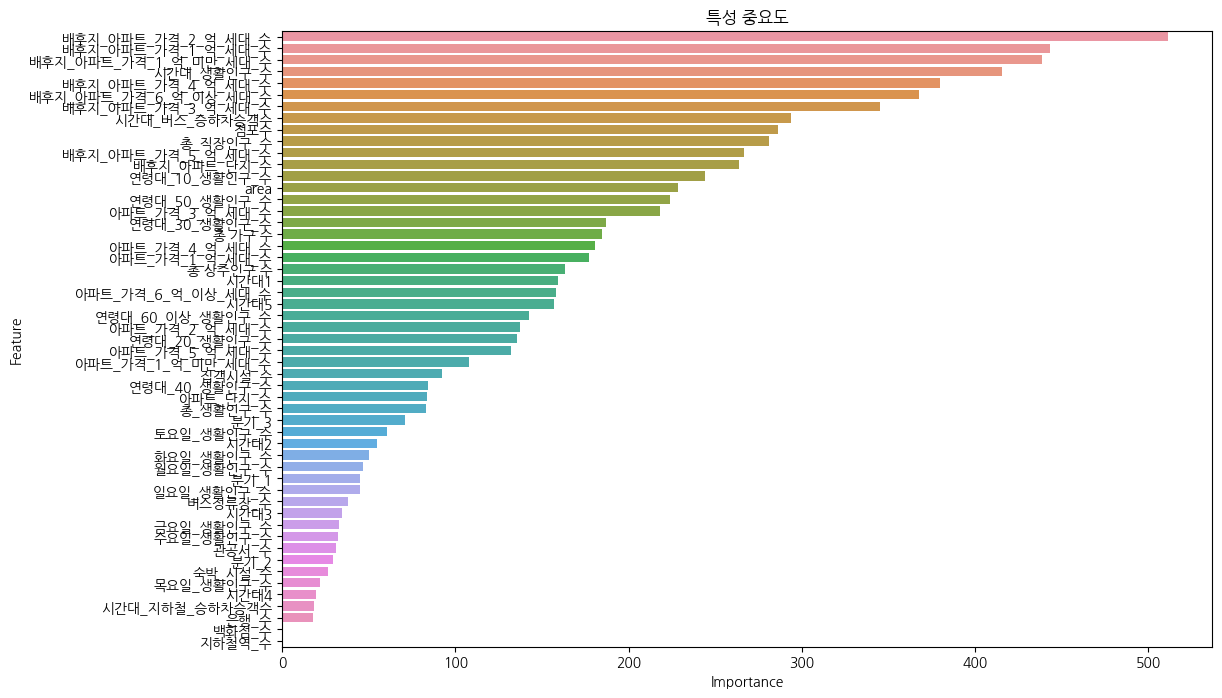

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 2: {'objective': 'regression', 'num_leaves': 37, 'n_estimators': 215, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 43}
Fold 3: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 4: {'objective': 'regression', 'num_leaves': 37, 'n_estimators': 215, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 43}
Fold 5: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}


In [35]:
#k폴드, 라이트gbm 베이스라인 코드

data_base_gol = pd.read_csv('data/골목상권_데이터230914.csv')

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수','시간대_생활인구_수', 
        '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
       '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수']

X = data_base_gol[features]
y = data_base_gol['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

## 1번. 생활인구 합치기(생활인구 관련 = 총 생활인구, 시간대(각 행별) 생활인구만 남기기

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 150473	training's l2: 2.26421e+10	valid_1's rmse: 138997	valid_1's l2: 1.93203e+10
[2]	training's rmse: 144758	training's l2: 2.0955e+10	valid_1's rmse: 134148	valid_1's l2: 1.79957e+10
[3]	training's rmse: 139378	training's l2: 1.94262e+10	valid_1's rmse: 129619	valid_1's l2: 1.68012e+10
[4]	training's rmse: 134323	training's l2: 1.80428e+10	valid_1's rmse: 125415	valid_1's l2: 1.5729e+10
[5]	training's rmse: 129579	training's l2: 1.67908e+10	valid_1's rmse: 121454	valid_1's l2: 1.47511e+10
[6]	training's rmse: 125146	training's l2: 1.56616e+10	valid_1's rmse: 117805	valid_1's l2: 1.3878e+10
[7]	training's rmse: 120951	training's l2: 1.46292e+10	valid_1's rmse: 114381	valid_1's l2: 1.3083e+10
[8]	training's rmse: 117014	training's l2: 1.36924e+10	valid_1's rmse: 111141	val

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 142872	training's l2: 2.04124e+10	valid_1's rmse: 175415	valid_1's l2: 3.07705e+10
[2]	training's rmse: 138840	training's l2: 1.92765e+10	valid_1's rmse: 171027	valid_1's l2: 2.92501e+10
[3]	training's rmse: 134998	training's l2: 1.82245e+10	valid_1's rmse: 166927	valid_1's l2: 2.78647e+10
[4]	training's rmse: 131285	training's l2: 1.72357e+10	valid_1's rmse: 162823	valid_1's l2: 2.65112e+10
[5]	training's rmse: 127711	training's l2: 1.63101e+10	valid_1's rmse: 158783	valid_1's l2: 2.52121e+10
[6]	training's rmse: 124381	training's l2: 1.54706e+10	valid_1's rmse: 155186	valid_1's l2: 2.40828e+10
[7]	training's rmse: 121129	training's l2: 1.46722e+10	valid_1's rmse: 151655	valid_1's l2: 2.29992e+10
[8]	training's rmse: 118065	training's l2: 1.39394e+10	valid_1's rmse: 148238

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 146781	training's l2: 2.15447e+10	valid_1's rmse: 161145	valid_1's l2: 2.59678e+10
[2]	training's rmse: 142636	training's l2: 2.0345e+10	valid_1's rmse: 157041	valid_1's l2: 2.46619e+10
[3]	training's rmse: 138702	training's l2: 1.92382e+10	valid_1's rmse: 153164	valid_1's l2: 2.34593e+10
[4]	training's rmse: 134841	training's l2: 1.81821e+10	valid_1's rmse: 149750	valid_1's l2: 2.24252e+10
[5]	training's rmse: 131199	training's l2: 1.72132e+10	valid_1's rmse: 146134	valid_1's l2: 2.13552e+10
[6]	training's rmse: 127803	training's l2: 1.63335e+10	valid_1's rmse: 142709	valid_1's l2: 2.03659e+10
[7]	training's rmse: 124302	training's l2: 1.5451e+10	valid_1's rmse: 139673	valid_1's l2: 1.95086e+10
[8]	training's rmse: 120998	training's l2: 1.46406e+10	valid_1's rmse: 136675	v

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 153910	training's l2: 2.36881e+10	valid_1's rmse: 131341	valid_1's l2: 1.72506e+10
[2]	training's rmse: 149362	training's l2: 2.2309e+10	valid_1's rmse: 127300	valid_1's l2: 1.62052e+10
[3]	training's rmse: 145005	training's l2: 2.10264e+10	valid_1's rmse: 123545	valid_1's l2: 1.52635e+10
[4]	training's rmse: 140864	training's l2: 1.98427e+10	valid_1's rmse: 119985	valid_1's l2: 1.43965e+10
[5]	training's rmse: 136938	training's l2: 1.8752e+10	valid_1's rmse: 116637	valid_1's l2: 1.36043e+10
[6]	training's rmse: 133316	training's l2: 1.77732e+10	valid_1's rmse: 113563	valid_1's l2: 1.28966e+10
[7]	training's rmse: 129765	training's l2: 1.68389e+10	valid_1's rmse: 110543	valid_1's l2: 1.22197e+10
[8]	training's rmse: 126496	training's l2: 1.60013e+10	valid_1's rmse: 107711	v

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 152328	training's l2: 2.32037e+10	valid_1's rmse: 137853	valid_1's l2: 1.90035e+10
[2]	training's rmse: 147872	training's l2: 2.18662e+10	valid_1's rmse: 133937	valid_1's l2: 1.79392e+10
[3]	training's rmse: 143658	training's l2: 2.06376e+10	valid_1's rmse: 130268	valid_1's l2: 1.69696e+10
[4]	training's rmse: 139642	training's l2: 1.94999e+10	valid_1's rmse: 126771	valid_1's l2: 1.60708e+10
[5]	training's rmse: 135833	training's l2: 1.84505e+10	valid_1's rmse: 123453	valid_1's l2: 1.52407e+10
[6]	training's rmse: 132196	training's l2: 1.74757e+10	valid_1's rmse: 120309	valid_1's l2: 1.44742e+10
[7]	training's rmse: 128700	training's l2: 1.65636e+10	valid_1's rmse: 117116	valid_1's l2: 1.37162e+10
[8]	training's rmse: 125384	training's l2: 1.57212e+10	valid_1's rmse: 114162

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 50382.45875872562
평균 MAE: 29443.2929163149
                   Feature  Importance
31     배후지_아파트_가격_2_억_세대_수       672.4
30     배후지_아파트_가격_1_억_세대_수       632.2
22              시간대_생활인구_수       570.4
29  배후지_아파트_가격_1_억_미만_세대_수       541.0
35  배후지_아파트_가격_6_억_이상_세대_수       502.4
33     배후지_아파트_가격_4_억_세대_수       473.6
32     배후지_아파트_가격_3_억_세대_수       463.8
21                총_생활인구_수       434.4
34     배후지_아파트_가격_5_억_세대_수       423.0
8                     area       369.4
9                      점포수       368.8
28            배후지_아파트_단지_수       357.8
12                총_직장인구_수       356.6
36           시간대_버스_승하차승객수       348.6
17         아파트_가격_3_억_세대_수       307.4
15         아파트_가격_1_억_세대_수       266.0
18         아파트_가격_4_억_세대_수       258.2
20      아파트_가격_6_억_이상_세대_수       249.4
10                총 상주인구 수       244.0
11                  총 가구 수       232.0
16         아파트_가격_2_억_세대_수       231.0
19         아파트_가격_5_억_세대_수       195.8
0                     시간대1       190.6
4           

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


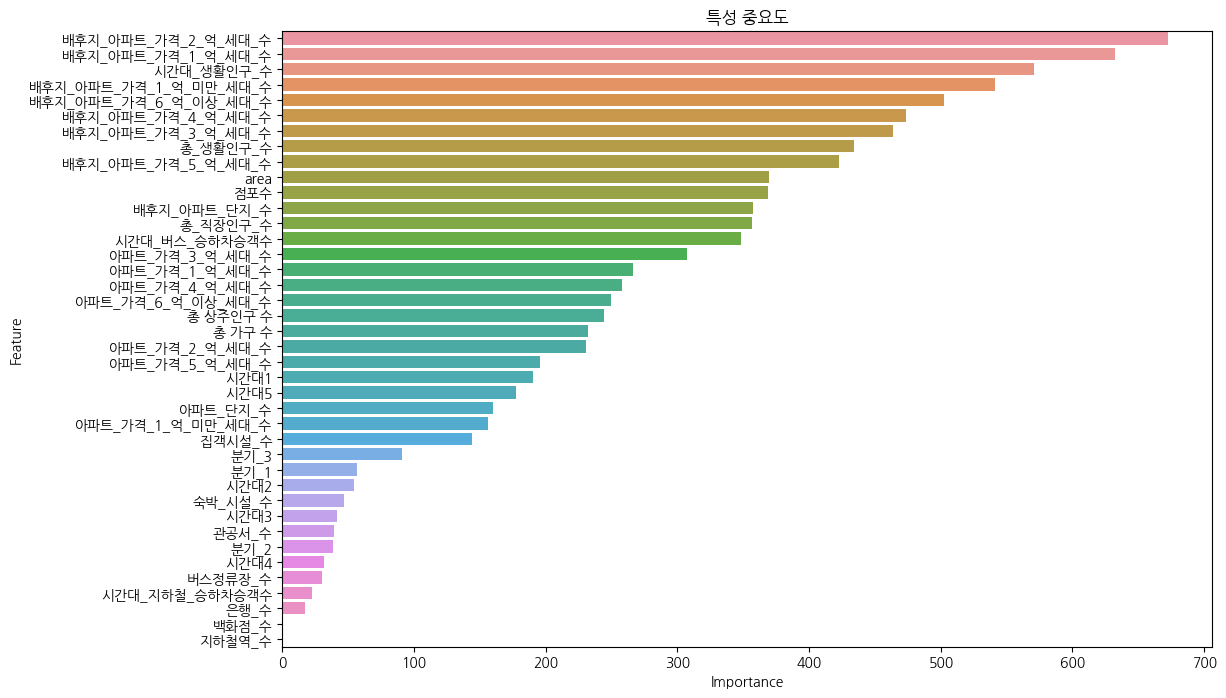

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 2: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 3: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 4: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 5: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}


In [8]:
# 데이터 로드
data1 = pd.read_csv('data/골목상권_데이터230914.csv')

#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수','시간대_생활인구_수',
        '집객시설_수', '관공서_수', '은행_수', '백화점_수', '숙박_시설_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수']

X = data1[features]
y = data1['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

## 2번. 생활인구 합치기(생활인구 관련 = 시간대(각 행별) 생활인구만 남기기

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 151834	training's l2: 2.30537e+10	valid_1's rmse: 140028	valid_1's l2: 1.96079e+10
[2]	training's rmse: 147345	training's l2: 2.17105e+10	valid_1's rmse: 136102	valid_1's l2: 1.85236e+10
[3]	training's rmse: 143079	training's l2: 2.04715e+10	valid_1's rmse: 132343	valid_1's l2: 1.75147e+10
[4]	training's rmse: 139013	training's l2: 1.93245e+10	valid_1's rmse: 128778	valid_1's l2: 1.65839e+10
[5]	training's rmse: 135144	training's l2: 1.82639e+10	valid_1's rmse: 125311	valid_1's l2: 1.57029e+10
[6]	training's rmse: 131467	training's l2: 1.72835e+10	valid_1's rmse: 122175	valid_1's l2: 1.49268e+10
[7]	training's rmse: 127976	training's l2: 1.63779e+10	valid_1's rmse: 119158	valid_1's l2: 1.41985e+10
[8]	training's rmse: 124651	training's l2: 1.55379e+10	valid_1's rmse: 116300

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 142764	training's l2: 2.03814e+10	valid_1's rmse: 175435	valid_1's l2: 3.07773e+10
[2]	training's rmse: 138687	training's l2: 1.9234e+10	valid_1's rmse: 170953	valid_1's l2: 2.92248e+10
[3]	training's rmse: 134765	training's l2: 1.81615e+10	valid_1's rmse: 166611	valid_1's l2: 2.77592e+10
[4]	training's rmse: 131105	training's l2: 1.71885e+10	valid_1's rmse: 162627	valid_1's l2: 2.64477e+10
[5]	training's rmse: 127560	training's l2: 1.62716e+10	valid_1's rmse: 158727	valid_1's l2: 2.51942e+10
[6]	training's rmse: 124085	training's l2: 1.53971e+10	valid_1's rmse: 154879	valid_1's l2: 2.39876e+10
[7]	training's rmse: 120656	training's l2: 1.45579e+10	valid_1's rmse: 151119	valid_1's l2: 2.28369e+10
[8]	training's rmse: 117395	training's l2: 1.37816e+10	valid_1's rmse: 147654	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 146795	training's l2: 2.15487e+10	valid_1's rmse: 161077	valid_1's l2: 2.59458e+10
[2]	training's rmse: 142656	training's l2: 2.03507e+10	valid_1's rmse: 156857	valid_1's l2: 2.46041e+10
[3]	training's rmse: 138729	training's l2: 1.92456e+10	valid_1's rmse: 152900	valid_1's l2: 2.33785e+10
[4]	training's rmse: 134780	training's l2: 1.81657e+10	valid_1's rmse: 149219	valid_1's l2: 2.22662e+10
[5]	training's rmse: 131060	training's l2: 1.71767e+10	valid_1's rmse: 145506	valid_1's l2: 2.11719e+10
[6]	training's rmse: 127632	training's l2: 1.62899e+10	valid_1's rmse: 142065	valid_1's l2: 2.01825e+10
[7]	training's rmse: 124298	training's l2: 1.545e+10	valid_1's rmse: 139060	valid_1's l2: 1.93377e+10
[8]	training's rmse: 121167	training's l2: 1.46813e+10	valid_1's rmse: 136178	v

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 153860	training's l2: 2.3673e+10	valid_1's rmse: 131333	valid_1's l2: 1.72484e+10
[2]	training's rmse: 149262	training's l2: 2.22793e+10	valid_1's rmse: 127289	valid_1's l2: 1.62026e+10
[3]	training's rmse: 144895	training's l2: 2.09944e+10	valid_1's rmse: 123473	valid_1's l2: 1.52456e+10
[4]	training's rmse: 140747	training's l2: 1.98096e+10	valid_1's rmse: 119854	valid_1's l2: 1.43649e+10
[5]	training's rmse: 136810	training's l2: 1.87171e+10	valid_1's rmse: 116414	valid_1's l2: 1.35523e+10
[6]	training's rmse: 132981	training's l2: 1.76838e+10	valid_1's rmse: 113138	valid_1's l2: 1.28002e+10
[7]	training's rmse: 129350	training's l2: 1.67314e+10	valid_1's rmse: 110033	valid_1's l2: 1.21072e+10
[8]	training's rmse: 125944	training's l2: 1.58619e+10	valid_1's rmse: 106992	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 150971	training's l2: 2.27921e+10	valid_1's rmse: 136673	valid_1's l2: 1.86796e+10
[2]	training's rmse: 145309	training's l2: 2.11148e+10	valid_1's rmse: 131737	valid_1's l2: 1.73547e+10
[3]	training's rmse: 140003	training's l2: 1.9601e+10	valid_1's rmse: 127146	valid_1's l2: 1.61661e+10
[4]	training's rmse: 134967	training's l2: 1.82161e+10	valid_1's rmse: 122853	valid_1's l2: 1.50928e+10
[5]	training's rmse: 130296	training's l2: 1.69771e+10	valid_1's rmse: 118869	valid_1's l2: 1.41298e+10
[6]	training's rmse: 125969	training's l2: 1.58683e+10	valid_1's rmse: 115097	valid_1's l2: 1.32473e+10
[7]	training's rmse: 121880	training's l2: 1.48547e+10	valid_1's rmse: 111542	valid_1's l2: 1.24415e+10
[8]	training's rmse: 118157	training's l2: 1.39611e+10	valid_1's rmse: 108423	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 49597.94557661018
평균 MAE: 29072.589388842654
                   Feature  Importance
30     배후지_아파트_가격_2_억_세대_수       588.8
21              시간대_생활인구_수       547.2
29     배후지_아파트_가격_1_억_세대_수       525.4
28  배후지_아파트_가격_1_억_미만_세대_수       452.8
34  배후지_아파트_가격_6_억_이상_세대_수       413.0
32     배후지_아파트_가격_4_억_세대_수       401.2
31     배후지_아파트_가격_3_억_세대_수       398.4
9                      점포수       362.2
12                총_직장인구_수       349.0
8                     area       340.0
35           시간대_버스_승하차승객수       332.6
33     배후지_아파트_가격_5_억_세대_수       319.8
17         아파트_가격_3_억_세대_수       302.8
27            배후지_아파트_단지_수       294.4
15         아파트_가격_1_억_세대_수       247.4
20      아파트_가격_6_억_이상_세대_수       239.6
10                총 상주인구 수       234.8
18         아파트_가격_4_억_세대_수       232.4
16         아파트_가격_2_억_세대_수       220.6
11                  총 가구 수       214.4
0                     시간대1       176.2
19         아파트_가격_5_억_세대_수       166.8
4                     시간대5       165.0
14      아파

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


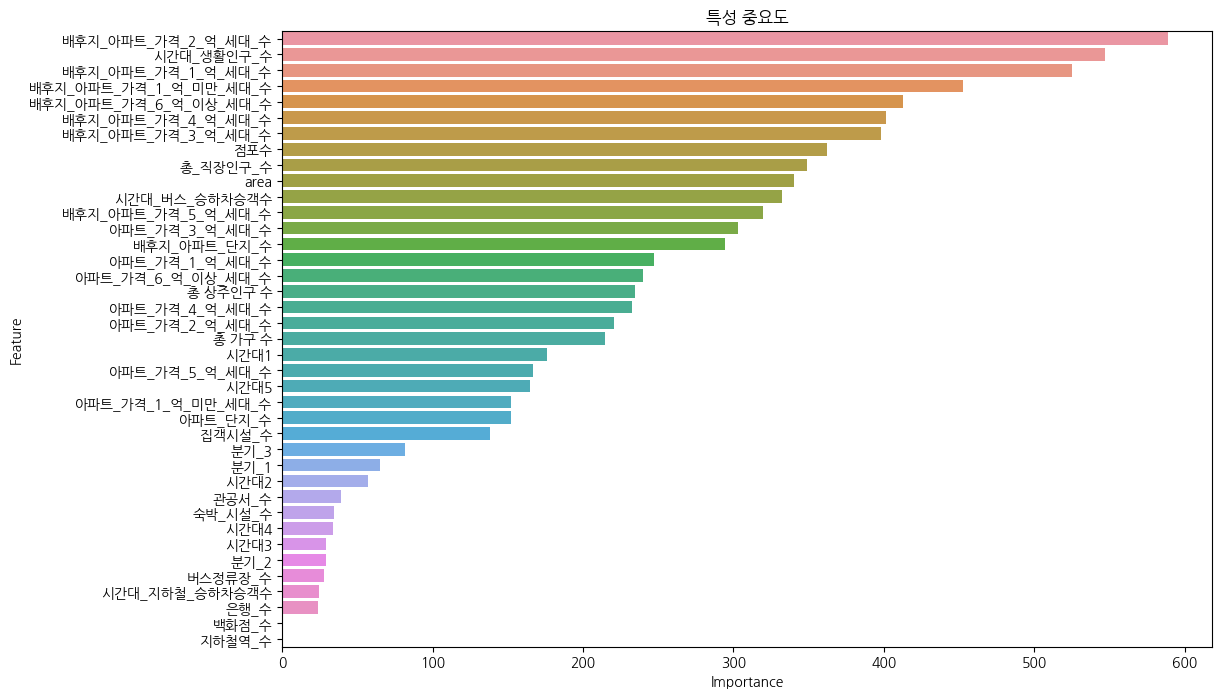

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 2: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 3: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 4: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 5: {'objective': 'regression', 'num_leaves': 37, 'n_estimators': 215, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 43}


In [9]:
# 데이터 로드
data2 = pd.read_csv('data/골목상권_데이터230914.csv')

#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '시간대_생활인구_수',
        '집객시설_수', '관공서_수', '은행_수', '백화점_수', '숙박_시설_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수']

X = data1[features]
y = data1['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

## 3번. 생활인구 평일/주말(나머지는 삭제)

In [6]:
data3 = pd.read_csv('data/Final/골목상권_230914.csv')

# 월요일부터 금요일까지의 생활인구 수 컬럼 이름
columns_to_sum1 = ['월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수', '금요일_생활인구_수']
columns_to_sum2 = ['토요일_생활인구_수', '일요일_생활인구_수']

# data3 데이터프레임에서 해당 컬럼을 더하고 각 5, 2로 나누어서 평일, 주말 생활인구수 컬럼 생성
data3['평일_생활인구_평균'] = data3[columns_to_sum1].sum(axis=1) / 5
data3['주말_생활인구_평균'] = data3[columns_to_sum2].sum(axis=1) / 2

data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2472 non-null   int64  
 1   매출                      2472 non-null   float64
 2   기준_년_코드                 2472 non-null   int64  
 3   상권_구분_코드_명              2472 non-null   object 
 4   상권_코드                   2472 non-null   int64  
 5   상권_코드_명                 2472 non-null   object 
 6   시간대1                    2472 non-null   int64  
 7   시간대2                    2472 non-null   int64  
 8   시간대3                    2472 non-null   int64  
 9   시간대4                    2472 non-null   int64  
 10  시간대5                    2472 non-null   int64  
 11  분기_1                    2472 non-null   int64  
 12  분기_2                    2472 non-null   int64  
 13  분기_3                    2472 non-null   int64  
 14  area                    2472 non-null   

In [7]:
data3 = data3.drop(['월요일_생활인구_수','화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수', '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수'], axis=1)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2472 non-null   int64  
 1   매출                      2472 non-null   float64
 2   기준_년_코드                 2472 non-null   int64  
 3   상권_구분_코드_명              2472 non-null   object 
 4   상권_코드                   2472 non-null   int64  
 5   상권_코드_명                 2472 non-null   object 
 6   시간대1                    2472 non-null   int64  
 7   시간대2                    2472 non-null   int64  
 8   시간대3                    2472 non-null   int64  
 9   시간대4                    2472 non-null   int64  
 10  시간대5                    2472 non-null   int64  
 11  분기_1                    2472 non-null   int64  
 12  분기_2                    2472 non-null   int64  
 13  분기_3                    2472 non-null   int64  
 14  area                    2472 non-null   

In [9]:
data3 = data3.drop(['Unnamed: 0'], axis=1)
data3.to_csv('파일명.csv', encoding='utf-8 sig', index=False)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 150503	training's l2: 2.26511e+10	valid_1's rmse: 138373	valid_1's l2: 1.91471e+10
[2]	training's rmse: 144908	training's l2: 2.09983e+10	valid_1's rmse: 133104	valid_1's l2: 1.77168e+10
[3]	training's rmse: 139665	training's l2: 1.95063e+10	valid_1's rmse: 128177	valid_1's l2: 1.64294e+10
[4]	training's rmse: 134745	training's l2: 1.81561e+10	valid_1's rmse: 123501	valid_1's l2: 1.52524e+10
[5]	training's rmse: 130129	training's l2: 1.69335e+10	valid_1's rmse: 119219	valid_1's l2: 1.42131e+10
[6]	training's rmse: 125823	training's l2: 1.58314e+10	valid_1's rmse: 115197	valid_1's l2: 1.32704e+10
[7]	training's rmse: 121778	training's l2: 1.48298e+10	valid_1's rmse: 111471	valid_1's l2: 1.24259e+10
[8]	training's rmse: 117921	training's l2: 1.39053e+10	valid_1's rmse: 108182

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 141375	training's l2: 1.99869e+10	valid_1's rmse: 173720	valid_1's l2: 3.01786e+10
[2]	training's rmse: 136015	training's l2: 1.85002e+10	valid_1's rmse: 167766	valid_1's l2: 2.81453e+10
[3]	training's rmse: 131065	training's l2: 1.71782e+10	valid_1's rmse: 162241	valid_1's l2: 2.63223e+10
[4]	training's rmse: 126316	training's l2: 1.59556e+10	valid_1's rmse: 156995	valid_1's l2: 2.46474e+10
[5]	training's rmse: 121890	training's l2: 1.48573e+10	valid_1's rmse: 152111	valid_1's l2: 2.31377e+10
[6]	training's rmse: 117723	training's l2: 1.38586e+10	valid_1's rmse: 147502	valid_1's l2: 2.1757e+10
[7]	training's rmse: 113749	training's l2: 1.29389e+10	valid_1's rmse: 143116	valid_1's l2: 2.04822e+10
[8]	training's rmse: 110052	training's l2: 1.21113e+10	valid_1's rmse: 139072	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 145340	training's l2: 2.11236e+10	valid_1's rmse: 160309	valid_1's l2: 2.56991e+10
[2]	training's rmse: 139870	training's l2: 1.95635e+10	valid_1's rmse: 155494	valid_1's l2: 2.41783e+10
[3]	training's rmse: 134701	training's l2: 1.81444e+10	valid_1's rmse: 151004	valid_1's l2: 2.28023e+10
[4]	training's rmse: 129906	training's l2: 1.68755e+10	valid_1's rmse: 146327	valid_1's l2: 2.14117e+10
[5]	training's rmse: 125276	training's l2: 1.56941e+10	valid_1's rmse: 142651	valid_1's l2: 2.03493e+10
[6]	training's rmse: 120975	training's l2: 1.46351e+10	valid_1's rmse: 138399	valid_1's l2: 1.91543e+10
[7]	training's rmse: 117214	training's l2: 1.3739e+10	valid_1's rmse: 135096	valid_1's l2: 1.8251e+10
[8]	training's rmse: 113397	training's l2: 1.28588e+10	valid_1's rmse: 131440	v

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 152445	training's l2: 2.32394e+10	valid_1's rmse: 130408	valid_1's l2: 1.70062e+10
[2]	training's rmse: 146660	training's l2: 2.15091e+10	valid_1's rmse: 125618	valid_1's l2: 1.578e+10
[3]	training's rmse: 141208	training's l2: 1.99396e+10	valid_1's rmse: 120925	valid_1's l2: 1.46229e+10
[4]	training's rmse: 136041	training's l2: 1.85072e+10	valid_1's rmse: 116389	valid_1's l2: 1.35464e+10
[5]	training's rmse: 131196	training's l2: 1.72123e+10	valid_1's rmse: 112582	valid_1's l2: 1.26746e+10
[6]	training's rmse: 126710	training's l2: 1.60555e+10	valid_1's rmse: 108603	valid_1's l2: 1.17947e+10
[7]	training's rmse: 122403	training's l2: 1.49825e+10	valid_1's rmse: 104927	valid_1's l2: 1.10098e+10
[8]	training's rmse: 118451	training's l2: 1.40307e+10	valid_1's rmse: 101431	v

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 152253	training's l2: 2.31811e+10	valid_1's rmse: 137556	valid_1's l2: 1.89216e+10
[2]	training's rmse: 147746	training's l2: 2.18288e+10	valid_1's rmse: 133289	valid_1's l2: 1.77658e+10
[3]	training's rmse: 143491	training's l2: 2.05897e+10	valid_1's rmse: 129286	valid_1's l2: 1.67148e+10
[4]	training's rmse: 139479	training's l2: 1.94544e+10	valid_1's rmse: 125527	valid_1's l2: 1.5757e+10
[5]	training's rmse: 135639	training's l2: 1.83981e+10	valid_1's rmse: 122067	valid_1's l2: 1.49004e+10
[6]	training's rmse: 131958	training's l2: 1.74128e+10	valid_1's rmse: 118637	valid_1's l2: 1.40746e+10
[7]	training's rmse: 128498	training's l2: 1.65116e+10	valid_1's rmse: 115432	valid_1's l2: 1.33245e+10
[8]	training's rmse: 125071	training's l2: 1.56428e+10	valid_1's rmse: 112186	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 42474.55520043748
평균 MAE: 23445.965600404954
                   Feature  Importance
22              시간대_생활인구_수      1821.8
9                      점포수       931.2
30           연령대_10_생활인구_수       628.0
4                     시간대5       467.2
31           연령대_20_생활인구_수       452.2
42     배후지_아파트_가격_5_억_세대_수       429.4
44           시간대_버스_승하차승객수       422.0
34           연령대_50_생활인구_수       420.8
35        연령대_60_이상_생활인구_수       411.6
32           연령대_30_생활인구_수       409.0
10                총 상주인구 수       366.8
21                총_생활인구_수       359.4
0                     시간대1       349.4
24              주말_생활인구_평균       315.2
8                     area       308.8
33           연령대_40_생활인구_수       273.8
25                  집객시설_수       264.2
43  배후지_아파트_가격_6_억_이상_세대_수       263.6
40     배후지_아파트_가격_3_억_세대_수       261.0
41     배후지_아파트_가격_4_억_세대_수       258.0
37  배후지_아파트_가격_1_억_미만_세대_수       245.6
19         아파트_가격_5_억_세대_수       240.4
20      아파트_가격_6_억_이상_세대_수       223.0
18        

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


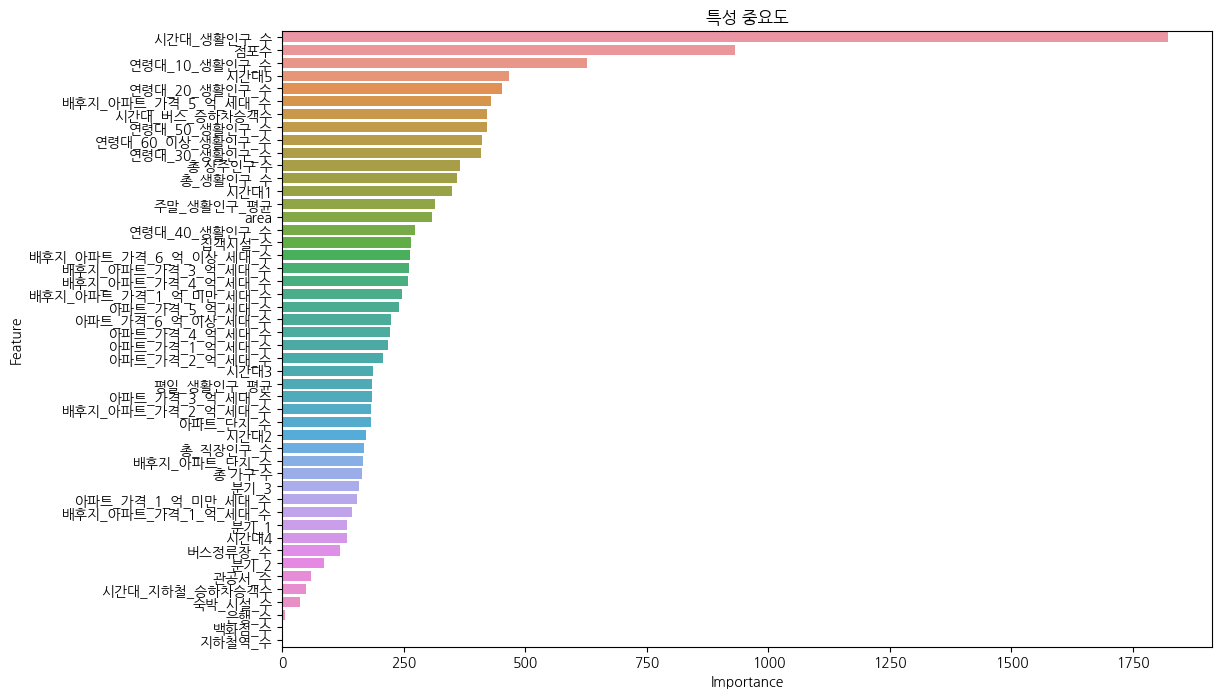

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 2: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 3: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 4: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 5: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}


In [12]:
#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수','시간대_생활인구_수', 
        '평일_생활인구_평균', '주말_생활인구_평균', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
       '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수']

X = data3[features]
y = data3['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

## 4. 생활인구 데이터 = 시간대 생활인구 + 평일/주말(총 생활인구 수만 삭제)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 150503	training's l2: 2.26511e+10	valid_1's rmse: 138373	valid_1's l2: 1.91471e+10
[2]	training's rmse: 144908	training's l2: 2.09983e+10	valid_1's rmse: 133104	valid_1's l2: 1.77168e+10
[3]	training's rmse: 139665	training's l2: 1.95063e+10	valid_1's rmse: 128177	valid_1's l2: 1.64294e+10
[4]	training's rmse: 134745	training's l2: 1.81561e+10	valid_1's rmse: 123501	valid_1's l2: 1.52524e+10
[5]	training's rmse: 130129	training's l2: 1.69335e+10	valid_1's rmse: 119219	valid_1's l2: 1.42131e+10
[6]	training's rmse: 125823	training's l2: 1.58314e+10	valid_1's rmse: 115197	valid_1's l2: 1.32704e+10
[7]	training's rmse: 121778	training's l2: 1.48298e+10	valid_1's rmse: 111471	valid_1's l2: 1.24259e+10
[8]	training's rmse: 117921	training's l2: 1.39053e+10	valid_1's rmse: 108182

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 141375	training's l2: 1.99869e+10	valid_1's rmse: 173720	valid_1's l2: 3.01786e+10
[2]	training's rmse: 136015	training's l2: 1.85002e+10	valid_1's rmse: 167766	valid_1's l2: 2.81453e+10
[3]	training's rmse: 131065	training's l2: 1.71782e+10	valid_1's rmse: 162241	valid_1's l2: 2.63223e+10
[4]	training's rmse: 126316	training's l2: 1.59556e+10	valid_1's rmse: 156995	valid_1's l2: 2.46474e+10
[5]	training's rmse: 121890	training's l2: 1.48573e+10	valid_1's rmse: 152111	valid_1's l2: 2.31377e+10
[6]	training's rmse: 117723	training's l2: 1.38586e+10	valid_1's rmse: 147502	valid_1's l2: 2.1757e+10
[7]	training's rmse: 113749	training's l2: 1.29389e+10	valid_1's rmse: 143116	valid_1's l2: 2.04822e+10
[8]	training's rmse: 110052	training's l2: 1.21113e+10	valid_1's rmse: 139072	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 145340	training's l2: 2.11236e+10	valid_1's rmse: 160309	valid_1's l2: 2.56991e+10
[2]	training's rmse: 139870	training's l2: 1.95635e+10	valid_1's rmse: 155494	valid_1's l2: 2.41783e+10
[3]	training's rmse: 134701	training's l2: 1.81444e+10	valid_1's rmse: 151004	valid_1's l2: 2.28023e+10
[4]	training's rmse: 129906	training's l2: 1.68755e+10	valid_1's rmse: 146327	valid_1's l2: 2.14117e+10
[5]	training's rmse: 125276	training's l2: 1.56941e+10	valid_1's rmse: 142651	valid_1's l2: 2.03493e+10
[6]	training's rmse: 120975	training's l2: 1.46351e+10	valid_1's rmse: 138399	valid_1's l2: 1.91543e+10
[7]	training's rmse: 117214	training's l2: 1.3739e+10	valid_1's rmse: 135096	valid_1's l2: 1.8251e+10
[8]	training's rmse: 113397	training's l2: 1.28588e+10	valid_1's rmse: 131440	v

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 152445	training's l2: 2.32394e+10	valid_1's rmse: 130408	valid_1's l2: 1.70062e+10
[2]	training's rmse: 146660	training's l2: 2.15091e+10	valid_1's rmse: 125618	valid_1's l2: 1.578e+10
[3]	training's rmse: 141208	training's l2: 1.99396e+10	valid_1's rmse: 120925	valid_1's l2: 1.46229e+10
[4]	training's rmse: 136041	training's l2: 1.85072e+10	valid_1's rmse: 116389	valid_1's l2: 1.35464e+10
[5]	training's rmse: 131196	training's l2: 1.72123e+10	valid_1's rmse: 112582	valid_1's l2: 1.26746e+10
[6]	training's rmse: 126710	training's l2: 1.60555e+10	valid_1's rmse: 108603	valid_1's l2: 1.17947e+10
[7]	training's rmse: 122403	training's l2: 1.49825e+10	valid_1's rmse: 104927	valid_1's l2: 1.10098e+10
[8]	training's rmse: 118451	training's l2: 1.40307e+10	valid_1's rmse: 101431	v

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 150914	training's l2: 2.27749e+10	valid_1's rmse: 136268	valid_1's l2: 1.85689e+10
[2]	training's rmse: 145255	training's l2: 2.10991e+10	valid_1's rmse: 130966	valid_1's l2: 1.71522e+10
[3]	training's rmse: 139878	training's l2: 1.95658e+10	valid_1's rmse: 125855	valid_1's l2: 1.58395e+10
[4]	training's rmse: 134888	training's l2: 1.81948e+10	valid_1's rmse: 121226	valid_1's l2: 1.46958e+10
[5]	training's rmse: 130207	training's l2: 1.69539e+10	valid_1's rmse: 117024	valid_1's l2: 1.36946e+10
[6]	training's rmse: 125715	training's l2: 1.58043e+10	valid_1's rmse: 112791	valid_1's l2: 1.27218e+10
[7]	training's rmse: 121507	training's l2: 1.4764e+10	valid_1's rmse: 108779	valid_1's l2: 1.18329e+10
[8]	training's rmse: 117561	training's l2: 1.38206e+10	valid_1's rmse: 105098	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 42465.84377867896
평균 MAE: 23336.350956884377
                   Feature  Importance
21              시간대_생활인구_수      2043.6
9                      점포수       984.2
29           연령대_10_생활인구_수       704.8
30           연령대_20_생활인구_수       511.6
22              평일_생활인구_평균       473.6
33           연령대_50_생활인구_수       473.4
4                     시간대5       471.4
43           시간대_버스_승하차승객수       465.6
34        연령대_60_이상_생활인구_수       464.2
31           연령대_30_생활인구_수       455.2
41     배후지_아파트_가격_5_억_세대_수       453.2
10                총 상주인구 수       402.4
23              주말_생활인구_평균       395.2
0                     시간대1       365.4
8                     area       336.0
32           연령대_40_생활인구_수       306.4
40     배후지_아파트_가격_4_억_세대_수       304.6
42  배후지_아파트_가격_6_억_이상_세대_수       304.0
24                  집객시설_수       284.8
39     배후지_아파트_가격_3_억_세대_수       272.4
36  배후지_아파트_가격_1_억_미만_세대_수       270.8
18         아파트_가격_4_억_세대_수       255.6
19         아파트_가격_5_억_세대_수       254.6
20      아파

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


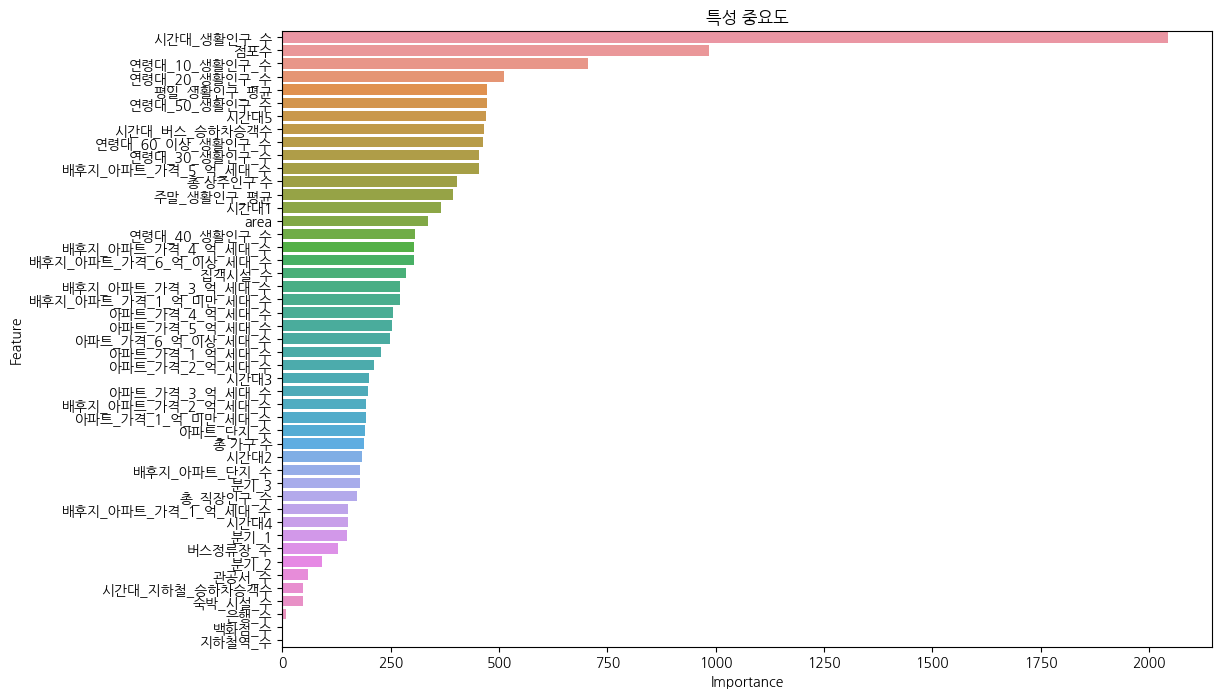

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 2: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 3: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 4: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 5: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}


In [13]:
#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '시간대_생활인구_수', 
        '평일_생활인구_평균', '주말_생활인구_평균', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
       '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수']

X = data3[features]
y = data3['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

## 5. 생활인구 데이터 = 시간대 생활인구 + 평일/주말만(총생활/연령별 삭제)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 150917	training's l2: 2.2776e+10	valid_1's rmse: 120429	valid_1's l2: 1.45031e+10
[2]	training's rmse: 145221	training's l2: 2.10893e+10	valid_1's rmse: 115671	valid_1's l2: 1.33798e+10
[3]	training's rmse: 139866	training's l2: 1.95626e+10	valid_1's rmse: 111005	valid_1's l2: 1.23222e+10
[4]	training's rmse: 134810	training's l2: 1.81738e+10	valid_1's rmse: 106664	valid_1's l2: 1.13772e+10
[5]	training's rmse: 130109	training's l2: 1.69282e+10	valid_1's rmse: 102816	valid_1's l2: 1.05712e+10
[6]	training's rmse: 125666	training's l2: 1.57918e+10	valid_1's rmse: 98952.7	valid_1's l2: 9.79164e+09
[7]	training's rmse: 121520	training's l2: 1.47671e+10	valid_1's rmse: 95217.1	valid_1's l2: 9.06629e+09
[8]	training's rmse: 117619	training's l2: 1.38342e+10	valid_1's rmse: 919

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 147416	training's l2: 2.17315e+10	valid_1's rmse: 154444	valid_1's l2: 2.3853e+10
[2]	training's rmse: 141770	training's l2: 2.00988e+10	valid_1's rmse: 148826	valid_1's l2: 2.21491e+10
[3]	training's rmse: 136478	training's l2: 1.86261e+10	valid_1's rmse: 143715	valid_1's l2: 2.06541e+10
[4]	training's rmse: 131496	training's l2: 1.72911e+10	valid_1's rmse: 138908	valid_1's l2: 1.92955e+10
[5]	training's rmse: 126804	training's l2: 1.60794e+10	valid_1's rmse: 134415	valid_1's l2: 1.80675e+10
[6]	training's rmse: 122405	training's l2: 1.49831e+10	valid_1's rmse: 130224	valid_1's l2: 1.69582e+10
[7]	training's rmse: 118283	training's l2: 1.39908e+10	valid_1's rmse: 126479	valid_1's l2: 1.59968e+10
[8]	training's rmse: 114218	training's l2: 1.30458e+10	valid_1's rmse: 12231

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 143755	training's l2: 2.06656e+10	valid_1's rmse: 183844	valid_1's l2: 3.37985e+10
[2]	training's rmse: 138268	training's l2: 1.91182e+10	valid_1's rmse: 177961	valid_1's l2: 3.16701e+10
[3]	training's rmse: 133102	training's l2: 1.77162e+10	valid_1's rmse: 172421	valid_1's l2: 2.97289e+10
[4]	training's rmse: 128306	training's l2: 1.64624e+10	valid_1's rmse: 167240	valid_1's l2: 2.79691e+10
[5]	training's rmse: 123766	training's l2: 1.5318e+10	valid_1's rmse: 162545	valid_1's l2: 2.64208e+10
[6]	training's rmse: 119507	training's l2: 1.42819e+10	valid_1's rmse: 158156	valid_1's l2: 2.50132e+10
[7]	training's rmse: 115539	training's l2: 1.33491e+10	valid_1's rmse: 153861	valid_1's l2: 2.36733e+10
[8]	training's rmse: 111793	training's l2: 1.24977e+10	valid_1's rmse: 14993

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 146633	training's l2: 2.15011e+10	valid_1's rmse: 161672	valid_1's l2: 2.61378e+10
[2]	training's rmse: 141170	training's l2: 1.99289e+10	valid_1's rmse: 155287	valid_1's l2: 2.41141e+10
[3]	training's rmse: 136047	training's l2: 1.85087e+10	valid_1's rmse: 149265	valid_1's l2: 2.22802e+10
[4]	training's rmse: 131243	training's l2: 1.72247e+10	valid_1's rmse: 143630	valid_1's l2: 2.06297e+10
[5]	training's rmse: 126658	training's l2: 1.60422e+10	valid_1's rmse: 138454	valid_1's l2: 1.91696e+10
[6]	training's rmse: 122334	training's l2: 1.49655e+10	valid_1's rmse: 133608	valid_1's l2: 1.7851e+10
[7]	training's rmse: 118351	training's l2: 1.40069e+10	valid_1's rmse: 128934	valid_1's l2: 1.6624e+10
[8]	training's rmse: 114576	training's l2: 1.31276e+10	valid_1's rmse: 124573

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 147356	training's l2: 2.17139e+10	valid_1's rmse: 156208	valid_1's l2: 2.44009e+10
[2]	training's rmse: 141748	training's l2: 2.00926e+10	valid_1's rmse: 151537	valid_1's l2: 2.29634e+10
[3]	training's rmse: 136535	training's l2: 1.86417e+10	valid_1's rmse: 146431	valid_1's l2: 2.14421e+10
[4]	training's rmse: 131643	training's l2: 1.733e+10	valid_1's rmse: 141638	valid_1's l2: 2.00614e+10
[5]	training's rmse: 126899	training's l2: 1.61032e+10	valid_1's rmse: 137943	valid_1's l2: 1.90283e+10
[6]	training's rmse: 122567	training's l2: 1.50227e+10	valid_1's rmse: 133656	valid_1's l2: 1.7864e+10
[7]	training's rmse: 118369	training's l2: 1.40112e+10	valid_1's rmse: 130461	valid_1's l2: 1.70201e+10
[8]	training's rmse: 114430	training's l2: 1.30943e+10	valid_1's rmse: 127347	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 146625	training's l2: 2.14989e+10	valid_1's rmse: 162981	valid_1's l2: 2.6563e+10
[2]	training's rmse: 141438	training's l2: 2.00047e+10	valid_1's rmse: 158427	valid_1's l2: 2.50991e+10
[3]	training's rmse: 136319	training's l2: 1.85829e+10	valid_1's rmse: 153307	valid_1's l2: 2.35031e+10
[4]	training's rmse: 131480	training's l2: 1.72871e+10	valid_1's rmse: 148453	valid_1's l2: 2.20384e+10
[5]	training's rmse: 126923	training's l2: 1.61094e+10	valid_1's rmse: 144391	valid_1's l2: 2.08487e+10
[6]	training's rmse: 122545	training's l2: 1.50172e+10	valid_1's rmse: 140093	valid_1's l2: 1.96259e+10
[7]	training's rmse: 118514	training's l2: 1.40456e+10	valid_1's rmse: 136535	valid_1's l2: 1.86417e+10
[8]	training's rmse: 114658	training's l2: 1.31464e+10	valid_1's rmse: 13278

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 151240	training's l2: 2.28737e+10	valid_1's rmse: 117520	valid_1's l2: 1.3811e+10
[2]	training's rmse: 145492	training's l2: 2.1168e+10	valid_1's rmse: 112411	valid_1's l2: 1.26362e+10
[3]	training's rmse: 140142	training's l2: 1.96398e+10	valid_1's rmse: 107918	valid_1's l2: 1.16462e+10
[4]	training's rmse: 135036	training's l2: 1.82346e+10	valid_1's rmse: 103435	valid_1's l2: 1.06987e+10
[5]	training's rmse: 130241	training's l2: 1.69626e+10	valid_1's rmse: 99229.1	valid_1's l2: 9.84642e+09
[6]	training's rmse: 125722	training's l2: 1.5806e+10	valid_1's rmse: 95193.7	valid_1's l2: 9.06184e+09
[7]	training's rmse: 121511	training's l2: 1.47649e+10	valid_1's rmse: 91464.9	valid_1's l2: 8.36583e+09
[8]	training's rmse: 117530	training's l2: 1.38133e+10	valid_1's rmse: 8793

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 148814	training's l2: 2.21457e+10	valid_1's rmse: 142010	valid_1's l2: 2.01668e+10
[2]	training's rmse: 143131	training's l2: 2.04866e+10	valid_1's rmse: 137010	valid_1's l2: 1.87717e+10
[3]	training's rmse: 137772	training's l2: 1.8981e+10	valid_1's rmse: 132343	valid_1's l2: 1.75146e+10
[4]	training's rmse: 132649	training's l2: 1.75958e+10	valid_1's rmse: 127898	valid_1's l2: 1.63579e+10
[5]	training's rmse: 127902	training's l2: 1.6359e+10	valid_1's rmse: 123886	valid_1's l2: 1.53478e+10
[6]	training's rmse: 123344	training's l2: 1.52138e+10	valid_1's rmse: 120061	valid_1's l2: 1.44147e+10
[7]	training's rmse: 119121	training's l2: 1.41899e+10	valid_1's rmse: 116337	valid_1's l2: 1.35342e+10
[8]	training's rmse: 115153	training's l2: 1.32603e+10	valid_1's rmse: 112985

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 149147	training's l2: 2.22448e+10	valid_1's rmse: 139831	valid_1's l2: 1.95527e+10
[2]	training's rmse: 143542	training's l2: 2.06044e+10	valid_1's rmse: 134365	valid_1's l2: 1.8054e+10
[3]	training's rmse: 138323	training's l2: 1.91332e+10	valid_1's rmse: 129283	valid_1's l2: 1.6714e+10
[4]	training's rmse: 133396	training's l2: 1.77944e+10	valid_1's rmse: 124542	valid_1's l2: 1.55108e+10
[5]	training's rmse: 128778	training's l2: 1.65837e+10	valid_1's rmse: 119997	valid_1's l2: 1.43993e+10
[6]	training's rmse: 124426	training's l2: 1.54818e+10	valid_1's rmse: 115695	valid_1's l2: 1.33854e+10
[7]	training's rmse: 120272	training's l2: 1.44655e+10	valid_1's rmse: 111810	valid_1's l2: 1.25015e+10
[8]	training's rmse: 116520	training's l2: 1.3577e+10	valid_1's rmse: 108200	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 149848	training's l2: 2.24544e+10	valid_1's rmse: 132873	valid_1's l2: 1.76553e+10
[2]	training's rmse: 144301	training's l2: 2.08229e+10	valid_1's rmse: 127442	valid_1's l2: 1.62416e+10
[3]	training's rmse: 139100	training's l2: 1.93488e+10	valid_1's rmse: 122402	valid_1's l2: 1.49822e+10
[4]	training's rmse: 134172	training's l2: 1.80021e+10	valid_1's rmse: 117711	valid_1's l2: 1.38558e+10
[5]	training's rmse: 129592	training's l2: 1.6794e+10	valid_1's rmse: 113274	valid_1's l2: 1.28309e+10
[6]	training's rmse: 125200	training's l2: 1.56751e+10	valid_1's rmse: 109102	valid_1's l2: 1.19033e+10
[7]	training's rmse: 121176	training's l2: 1.46836e+10	valid_1's rmse: 105310	valid_1's l2: 1.10903e+10
[8]	training's rmse: 117415	training's l2: 1.37862e+10	valid_1's rmse: 10163

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 41581.43239115858
평균 MAE: 22492.33410386112
                   Feature  Importance
21              시간대_생활인구_수      2121.8
9                      점포수      1164.4
22              평일_생활인구_평균       909.9
23              주말_생활인구_평균       729.2
35     배후지_아파트_가격_5_억_세대_수       581.5
37           시간대_버스_승하차승객수       548.1
4                     시간대5       477.5
10                총 상주인구 수       398.1
0                     시간대1       372.5
34     배후지_아파트_가격_4_억_세대_수       369.0
8                     area       354.9
33     배후지_아파트_가격_3_억_세대_수       325.8
24                  집객시설_수       318.6
36  배후지_아파트_가격_6_억_이상_세대_수       304.1
19         아파트_가격_5_억_세대_수       290.8
30  배후지_아파트_가격_1_억_미만_세대_수       287.1
20      아파트_가격_6_억_이상_세대_수       277.8
15         아파트_가격_1_억_세대_수       268.3
18         아파트_가격_4_억_세대_수       262.4
16         아파트_가격_2_억_세대_수       252.3
17         아파트_가격_3_억_세대_수       246.1
29            배후지_아파트_단지_수       216.1
12                총_직장인구_수       216.0
32     배후지_

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


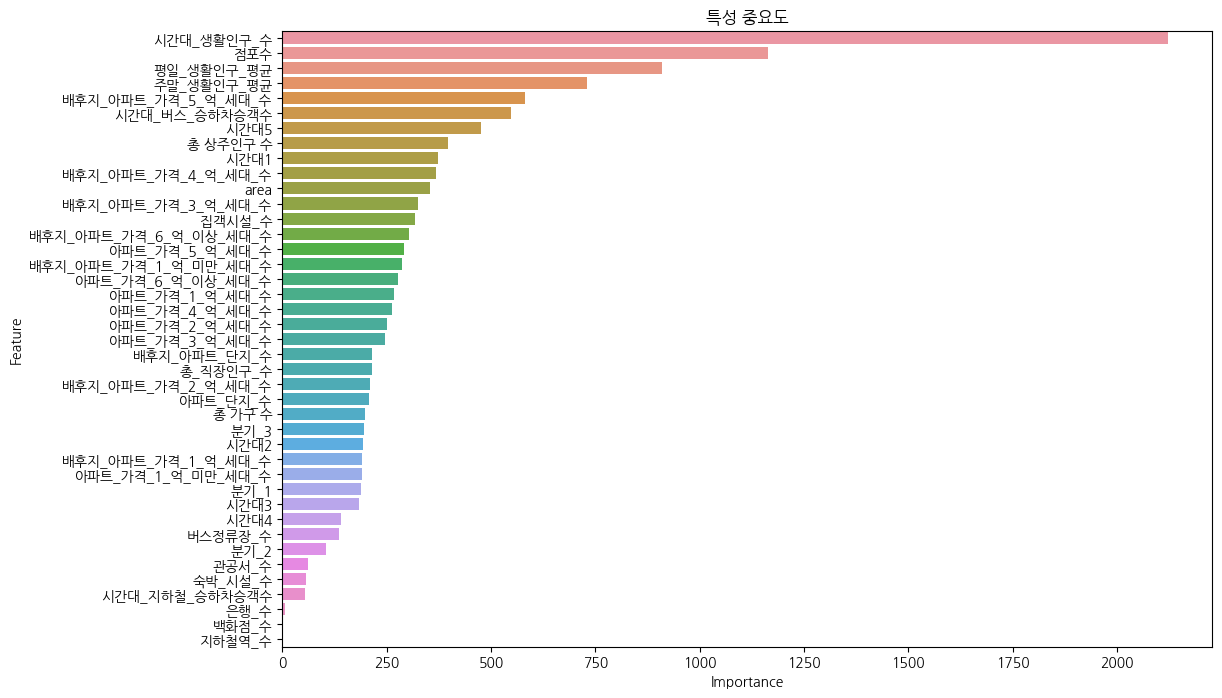

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 2: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 3: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 4: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 5: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 6: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 7: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate'

In [37]:
#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '시간대_생활인구_수', 
        '평일_생활인구_평균', '주말_생활인구_평균', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수']

X = data3[features]
y = data3['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 10
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

## 6. 생활인구 데이터 = 생활인구 그대로 연령별 합치기(MZ가 힘을합치면...?)

In [15]:
data4 = pd.read_csv('data/골목상권_데이터230914.csv')

data4['연령대_2030_생활인구_수'] = data4['연령대_20_생활인구_수'] + data4['연령대_30_생활인구_수']
data4['연령대_4050_생활인구_수'] = data4['연령대_40_생활인구_수'] + data4['연령대_50_생활인구_수']

data4 = data4.drop(['연령대_20_생활인구_수', '연령대_30_생활인구_수'], axis=1)
data4 = data4.drop(['연령대_40_생활인구_수', '연령대_50_생활인구_수'], axis=1)
# data4.info()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 151907	training's l2: 2.30758e+10	valid_1's rmse: 140035	valid_1's l2: 1.96099e+10
[2]	training's rmse: 147456	training's l2: 2.17432e+10	valid_1's rmse: 136013	valid_1's l2: 1.84994e+10
[3]	training's rmse: 143244	training's l2: 2.05188e+10	valid_1's rmse: 132188	valid_1's l2: 1.74736e+10
[4]	training's rmse: 139232	training's l2: 1.93857e+10	valid_1's rmse: 128599	valid_1's l2: 1.65378e+10
[5]	training's rmse: 135586	training's l2: 1.83836e+10	valid_1's rmse: 125420	valid_1's l2: 1.57301e+10
[6]	training's rmse: 131832	training's l2: 1.73796e+10	valid_1's rmse: 122301	valid_1's l2: 1.49575e+10
[7]	training's rmse: 128303	training's l2: 1.64616e+10	valid_1's rmse: 119409	valid_1's l2: 1.42586e+10
[8]	training's rmse: 124911	training's l2: 1.56027e+10	valid_1's rmse: 116583

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 142983	training's l2: 2.0444e+10	valid_1's rmse: 175584	valid_1's l2: 3.08297e+10
[2]	training's rmse: 139155	training's l2: 1.93642e+10	valid_1's rmse: 171303	valid_1's l2: 2.93446e+10
[3]	training's rmse: 135468	training's l2: 1.83515e+10	valid_1's rmse: 167282	valid_1's l2: 2.79833e+10
[4]	training's rmse: 131777	training's l2: 1.73652e+10	valid_1's rmse: 163199	valid_1's l2: 2.6634e+10
[5]	training's rmse: 128199	training's l2: 1.64351e+10	valid_1's rmse: 159326	valid_1's l2: 2.53848e+10
[6]	training's rmse: 124913	training's l2: 1.56032e+10	valid_1's rmse: 155667	valid_1's l2: 2.42323e+10
[7]	training's rmse: 121598	training's l2: 1.4786e+10	valid_1's rmse: 151963	valid_1's l2: 2.30927e+10
[8]	training's rmse: 118414	training's l2: 1.40219e+10	valid_1's rmse: 148595	va

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 146720	training's l2: 2.15267e+10	valid_1's rmse: 161099	valid_1's l2: 2.5953e+10
[2]	training's rmse: 142520	training's l2: 2.03118e+10	valid_1's rmse: 156978	valid_1's l2: 2.46421e+10
[3]	training's rmse: 138528	training's l2: 1.91899e+10	valid_1's rmse: 153094	valid_1's l2: 2.34379e+10
[4]	training's rmse: 134599	training's l2: 1.8117e+10	valid_1's rmse: 149597	valid_1's l2: 2.23792e+10
[5]	training's rmse: 130956	training's l2: 1.71496e+10	valid_1's rmse: 146030	valid_1's l2: 2.13249e+10
[6]	training's rmse: 127576	training's l2: 1.62755e+10	valid_1's rmse: 142710	valid_1's l2: 2.03663e+10
[7]	training's rmse: 124082	training's l2: 1.53964e+10	valid_1's rmse: 139836	valid_1's l2: 1.95541e+10
[8]	training's rmse: 120794	training's l2: 1.45912e+10	valid_1's rmse: 137041	v

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 153934	training's l2: 2.36957e+10	valid_1's rmse: 131509	valid_1's l2: 1.72947e+10
[2]	training's rmse: 149409	training's l2: 2.2323e+10	valid_1's rmse: 127641	valid_1's l2: 1.62921e+10
[3]	training's rmse: 145113	training's l2: 2.10578e+10	valid_1's rmse: 123956	valid_1's l2: 1.53651e+10
[4]	training's rmse: 140829	training's l2: 1.98327e+10	valid_1's rmse: 120219	valid_1's l2: 1.44525e+10
[5]	training's rmse: 136771	training's l2: 1.87063e+10	valid_1's rmse: 116705	valid_1's l2: 1.362e+10
[6]	training's rmse: 132914	training's l2: 1.76661e+10	valid_1's rmse: 113424	valid_1's l2: 1.28651e+10
[7]	training's rmse: 129245	training's l2: 1.67044e+10	valid_1's rmse: 110267	valid_1's l2: 1.21588e+10
[8]	training's rmse: 125717	training's l2: 1.58048e+10	valid_1's rmse: 107238	va

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 150952	training's l2: 2.27865e+10	valid_1's rmse: 136406	valid_1's l2: 1.86065e+10
[2]	training's rmse: 145272	training's l2: 2.1104e+10	valid_1's rmse: 131208	valid_1's l2: 1.72155e+10
[3]	training's rmse: 139951	training's l2: 1.95864e+10	valid_1's rmse: 126340	valid_1's l2: 1.59617e+10
[4]	training's rmse: 134963	training's l2: 1.82151e+10	valid_1's rmse: 121817	valid_1's l2: 1.48394e+10
[5]	training's rmse: 130292	training's l2: 1.69759e+10	valid_1's rmse: 117599	valid_1's l2: 1.38296e+10
[6]	training's rmse: 125897	training's l2: 1.58501e+10	valid_1's rmse: 113676	valid_1's l2: 1.29223e+10
[7]	training's rmse: 121624	training's l2: 1.47923e+10	valid_1's rmse: 109797	valid_1's l2: 1.20553e+10
[8]	training's rmse: 117608	training's l2: 1.38317e+10	valid_1's rmse: 106158	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 50100.19454032334
평균 MAE: 29195.87306286615
                   Feature  Importance
42     배후지_아파트_가격_2_억_세대_수       546.0
41     배후지_아파트_가격_1_억_세대_수       462.6
40  배후지_아파트_가격_1_억_미만_세대_수       448.6
22              시간대_생활인구_수       400.2
44     배후지_아파트_가격_4_억_세대_수       367.4
46  배후지_아파트_가격_6_억_이상_세대_수       365.4
43     배후지_아파트_가격_3_억_세대_수       363.2
47           시간대_버스_승하차승객수       321.0
9                      점포수       308.6
39            배후지_아파트_단지_수       288.0
12                총_직장인구_수       284.8
45     배후지_아파트_가격_5_억_세대_수       275.8
8                     area       252.8
35           연령대_10_생활인구_수       251.2
36         연령대_2030_생활인구_수       222.8
17         아파트_가격_3_억_세대_수       221.0
15         아파트_가격_1_억_세대_수       205.6
38        연령대_60_이상_생활인구_수       203.2
18         아파트_가격_4_억_세대_수       194.8
20      아파트_가격_6_억_이상_세대_수       187.2
11                  총 가구 수       186.4
10                총 상주인구 수       172.4
4                     시간대5       167.6
16         

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


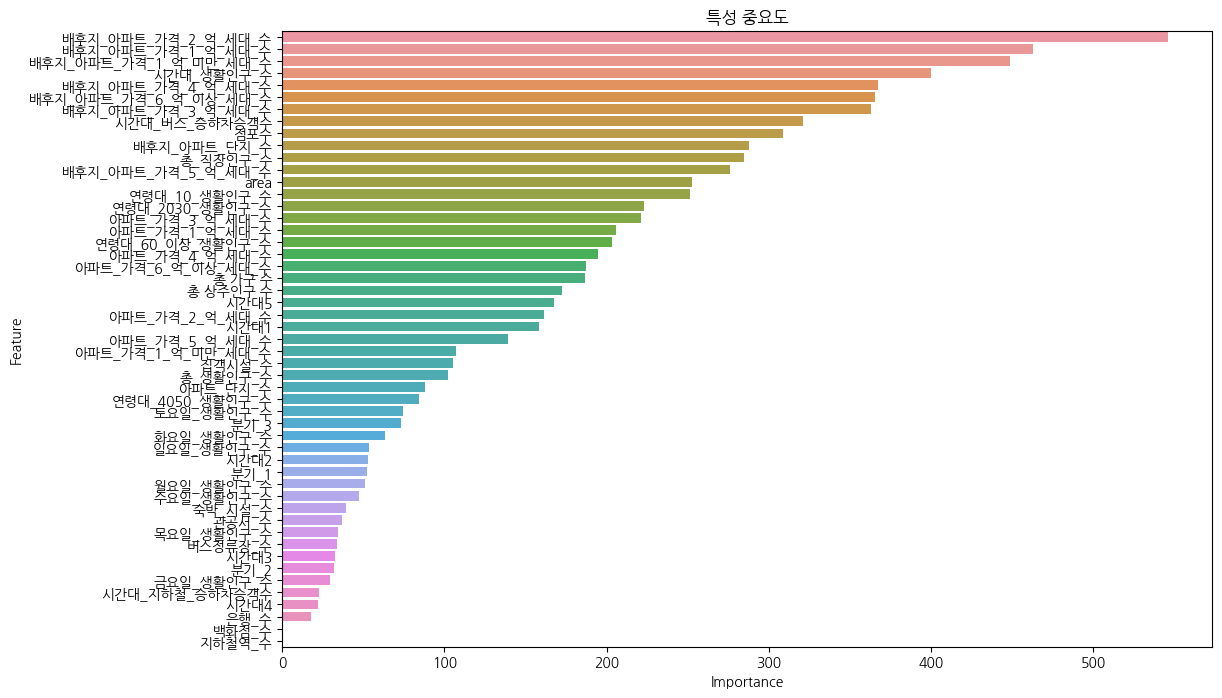

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 2: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 3: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 4: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 5: {'objective': 'regression', 'num_leaves': 37, 'n_estimators': 215, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 43}


In [16]:
#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수','시간대_생활인구_수', 
        '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '연령대_10_생활인구_수', '연령대_2030_생활인구_수',
       '연령대_4050_생활인구_수', '연령대_60_이상_생활인구_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수']
X = data4[features]
y = data4['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

## 7. 직장인구를 비율으로 만들기

### 총 직장인구 수는 19년 이후로 동일하게 작성을 해서 사실 시간대 6 X 분기 4 X 연도 3 해서 다 있었다면
### 72가 맞겠지만 아닌 값들도 있었음

In [17]:
data5 = pd.read_csv('data/골목상권_데이터230914.csv')
data5['총_직장인구_수'].value_counts()

총_직장인구_수
1683     72
444      72
148      72
663      72
361      72
783      72
1556     72
1338     72
2179     72
10837    72
494      72
5085     72
1959     72
1724     72
268      72
317      72
273      72
578      72
292      72
962      72
117      72
3430     72
1251     72
994      72
271      72
2628     72
1522     72
780      72
1139     72
377      72
1542     72
166      60
1637     48
39       48
1594     42
636      42
Name: count, dtype: int64

### 왜? 총합본(=인코딩 전=시간대6 찢어지기 전)을 보자
### 매출데이터에 결측치가 있는 것이 다 달랐기 때문(연도별로) 그래서 없는 상권이 존재했다

In [18]:
ddado = pd.read_csv('data/Final/총합본(Center_Points).csv')
ddado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   기준_년_코드             914 non-null    int64  
 1   기준_분기_코드            914 non-null    int64  
 2   상권_코드               914 non-null    int64  
 3   점포수                 914 non-null    int64  
 4   시간대_00~06_매출_금액_평균  914 non-null    float64
 5   시간대_06~11_매출_금액_평균  914 non-null    float64
 6   시간대_11~14_매출_금액_평균  914 non-null    float64
 7   시간대_14~17_매출_금액_평균  914 non-null    float64
 8   시간대_17~21_매출_금액_평균  914 non-null    float64
 9   시간대_21~24_매출_금액_평균  914 non-null    float64
 10  총 상주인구 수            902 non-null    float64
 11  총 가구 수              902 non-null    float64
 12  아파트 가구 수            902 non-null    float64
 13  비아파트 가구 수           902 non-null    float64
 14  총_직장인구_수            914 non-null    float64
 15  아파트_단지_수            846 non-null    float64
 16  아파트_가격_1

In [19]:
ddado['상권_코드'].value_counts()

상권_코드
2110949    12
2120200    12
2120207    12
2120206    12
2120205    12
           ..
2110982    10
2110966     8
2111000     8
2110988     7
2110954     7
Name: count, Length: 78, dtype: int64

In [20]:
# 직장인구 비율을 구하기 위한 직장인구 총합계산

comp_numbers = [1683, 444, 148, 663, 361, 783, 1556, 1338, 2179, 10837, 494, 5085, 1959, 1724, 268, 317, 273, 578, 292, 962, 117, 3430, 1251, 994, 271, 2628, 1522, 780, 1139, 377, 1542, 166, 1637, 39, 1594, 636]
comp_total = sum(comp_numbers)
comp_total

50067

In [21]:
data5['총_직장인구_대비_비율'] = data5['총_직장인구_수'] / 500.67
data5 = data5.drop(columns=['총_직장인구_수'])
data5

매출  기준_년_코드 상권_구분_코드_명    상권_코드   상권_코드_명  점포수  시간대1  시간대2  \
0     125163.15020     2020       골목상권  2110949      한남IC    6     1     0   
1      94688.22344     2020       골목상권  2110951  신사은행나무공원    3     1     0   
2     177736.46150     2020       골목상권  2110952    논현목련공원    3     1     0   
3      34587.75458     2020       골목상권  2110954       국기원    3     1     0   
4     221061.48320     2020       골목상권  2110955    논현초등학교   30     1     0   
...            ...      ...        ...      ...       ...  ...   ...   ...   
2467  118941.35870     2022       골목상권  2110958    역삼역 4번    3     0     0   
2468  214056.82610     2022       골목상권  2110976    언북초등학교    3     0     0   
2469  340072.11410     2022       골목상권  2110961    언주역 3번    4     0     0   
2470  533322.40060     2022       골목상권  2110971   선정릉역 4번    7     0     0   
2471  201683.59780     2022       골목상권  2110994    개포고등학교    3     0     0   

      시간대3  시간대4  ...  배후지_아파트_가격_2_억_세대_수  배후지_아파트_가격_3_억_세대_수  \
0        0     0  ...           614.170000           292.830000   
1        0     0  ...           614.357987           292.925346   
2        0     0  ...           614.485220           292.997815   
3        0     0  ...           614.339589           293.068230   
4        0     0  ...           614.501397           293.162426   
...    ...   ...  ...                  ...                  ...   
2467     0     0  ...           617.025602           295.324578   
2468     0     0  ...           617.068493           295.392671   
2469     0     0  ...           617.215365           295.435305   
2470     0     0  ...           617.069822           295.463799   
2471     0     0  ...           616.704963           295.394812   

      배후지_아파트_가격_4_억_세대_수  배후지_아파트_가격_5_억_세대_수  배후지_아파트_가격_6_억_이상_세대_수  \
0              149.092500            99.832500             1085.562500   
1              149.132955            99.856597             1085.263984   
2              149.161344            99.869870             1085.670761   
3              149.160578            99.877316             1086.065624   
4              149.202311            99.898098             1086.489818   
...                   ...                  ...                     ...   
2467           149.700920            99.421599             1092.132824   
2468           149.719407            99.441591             1092.525272   
2469           149.646478            99.421948             1092.285598   
2470           149.654021            99.421714             1092.261037   
2471           149.600483            99.400849             1092.422955   

      시간대_버스_승하차승객수  시간대_지하철_승하차승객수  버스정류장_수  지하철역_수  총_직장인구_대비_비율  
0                 0               0        0       0      3.361496  
1                 0               0        0       0      0.545269  
2                 0               0        0       0      0.233687  
3                 0               0        0       0      1.270298  
4                 0               0        0       0      6.850820  
...             ...             ...      ...     ...           ...  
2467              0               0        0       0      1.985340  
2468              0               0        0       0      1.154453  
2469              0               0        0       0      1.921425  
2470              0               0        0       0      3.079873  
2471              0               0        0       0      0.986678  

[2472 rows x 58 columns]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 151819	training's l2: 2.30489e+10	valid_1's rmse: 139936	valid_1's l2: 1.95821e+10
[2]	training's rmse: 147280	training's l2: 2.16915e+10	valid_1's rmse: 135819	valid_1's l2: 1.84469e+10
[3]	training's rmse: 142948	training's l2: 2.04342e+10	valid_1's rmse: 131917	valid_1's l2: 1.74022e+10
[4]	training's rmse: 138900	training's l2: 1.92932e+10	valid_1's rmse: 128328	valid_1's l2: 1.64681e+10
[5]	training's rmse: 135019	training's l2: 1.82301e+10	valid_1's rmse: 124946	valid_1's l2: 1.56116e+10
[6]	training's rmse: 131330	training's l2: 1.72475e+10	valid_1's rmse: 121736	valid_1's l2: 1.48196e+10
[7]	training's rmse: 127838	training's l2: 1.63427e+10	valid_1's rmse: 118573	valid_1's l2: 1.40595e+10
[8]	training's rmse: 124481	training's l2: 1.54956e+10	valid_1's rmse: 115710

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 141890	training's l2: 2.01328e+10	valid_1's rmse: 174312	valid_1's l2: 3.03845e+10
[2]	training's rmse: 136816	training's l2: 1.87185e+10	valid_1's rmse: 168824	valid_1's l2: 2.85015e+10
[3]	training's rmse: 131997	training's l2: 1.74233e+10	valid_1's rmse: 163540	valid_1's l2: 2.67453e+10
[4]	training's rmse: 127484	training's l2: 1.62521e+10	valid_1's rmse: 158537	valid_1's l2: 2.51341e+10
[5]	training's rmse: 123202	training's l2: 1.51787e+10	valid_1's rmse: 153840	valid_1's l2: 2.36667e+10
[6]	training's rmse: 118965	training's l2: 1.41526e+10	valid_1's rmse: 149482	valid_1's l2: 2.23449e+10
[7]	training's rmse: 114994	training's l2: 1.32237e+10	valid_1's rmse: 145379	valid_1's l2: 2.11351e+10
[8]	training's rmse: 111195	training's l2: 1.23644e+10	valid_1's rmse: 141533

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 146703	training's l2: 2.15218e+10	valid_1's rmse: 161107	valid_1's l2: 2.59556e+10
[2]	training's rmse: 142491	training's l2: 2.03036e+10	valid_1's rmse: 156978	valid_1's l2: 2.4642e+10
[3]	training's rmse: 138493	training's l2: 1.91802e+10	valid_1's rmse: 153092	valid_1's l2: 2.34371e+10
[4]	training's rmse: 134553	training's l2: 1.81044e+10	valid_1's rmse: 149592	valid_1's l2: 2.23778e+10
[5]	training's rmse: 130862	training's l2: 1.71248e+10	valid_1's rmse: 146071	valid_1's l2: 2.13366e+10
[6]	training's rmse: 127470	training's l2: 1.62487e+10	valid_1's rmse: 142761	valid_1's l2: 2.03808e+10
[7]	training's rmse: 123977	training's l2: 1.53704e+10	valid_1's rmse: 139896	valid_1's l2: 1.95708e+10
[8]	training's rmse: 120626	training's l2: 1.45506e+10	valid_1's rmse: 136943	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 152631	training's l2: 2.32963e+10	valid_1's rmse: 130289	valid_1's l2: 1.69752e+10
[2]	training's rmse: 146795	training's l2: 2.15488e+10	valid_1's rmse: 125254	valid_1's l2: 1.56885e+10
[3]	training's rmse: 141243	training's l2: 1.99495e+10	valid_1's rmse: 120511	valid_1's l2: 1.45228e+10
[4]	training's rmse: 136029	training's l2: 1.85038e+10	valid_1's rmse: 116024	valid_1's l2: 1.34616e+10
[5]	training's rmse: 131241	training's l2: 1.72242e+10	valid_1's rmse: 111990	valid_1's l2: 1.25417e+10
[6]	training's rmse: 126667	training's l2: 1.60445e+10	valid_1's rmse: 107970	valid_1's l2: 1.16576e+10
[7]	training's rmse: 122448	training's l2: 1.49936e+10	valid_1's rmse: 104427	valid_1's l2: 1.0905e+10
[8]	training's rmse: 118390	training's l2: 1.40162e+10	valid_1's rmse: 100937	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 152289	training's l2: 2.31921e+10	valid_1's rmse: 137893	valid_1's l2: 1.90144e+10
[2]	training's rmse: 147781	training's l2: 2.18392e+10	valid_1's rmse: 134004	valid_1's l2: 1.7957e+10
[3]	training's rmse: 143460	training's l2: 2.05809e+10	valid_1's rmse: 130175	valid_1's l2: 1.69456e+10
[4]	training's rmse: 139409	training's l2: 1.94349e+10	valid_1's rmse: 126699	valid_1's l2: 1.60525e+10
[5]	training's rmse: 135553	training's l2: 1.83745e+10	valid_1's rmse: 123435	valid_1's l2: 1.52362e+10
[6]	training's rmse: 131867	training's l2: 1.73889e+10	valid_1's rmse: 120270	valid_1's l2: 1.44648e+10
[7]	training's rmse: 128283	training's l2: 1.64566e+10	valid_1's rmse: 116988	valid_1's l2: 1.36862e+10
[8]	training's rmse: 124845	training's l2: 1.55864e+10	valid_1's rmse: 113902	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 49906.78446087152
평균 MAE: 29176.36633528758
                   Feature  Importance
44     배후지_아파트_가격_2_억_세대_수       511.2
43     배후지_아파트_가격_1_억_세대_수       443.2
42  배후지_아파트_가격_1_억_미만_세대_수       438.4
22              시간대_생활인구_수       415.2
46     배후지_아파트_가격_4_억_세대_수       379.4
48  배후지_아파트_가격_6_억_이상_세대_수       367.6
45     배후지_아파트_가격_3_억_세대_수       345.0
49           시간대_버스_승하차승객수       293.4
9                      점포수       286.2
12            총_직장인구_대비_비율       281.2
47     배후지_아파트_가격_5_억_세대_수       266.8
41            배후지_아파트_단지_수       263.8
35           연령대_10_생활인구_수       244.0
8                     area       228.2
39           연령대_50_생활인구_수       223.6
17         아파트_가격_3_억_세대_수       218.0
37           연령대_30_생활인구_수       186.8
11                  총 가구 수       184.6
18         아파트_가격_4_억_세대_수       180.8
15         아파트_가격_1_억_세대_수       177.2
10                총 상주인구 수       163.4
0                     시간대1       159.2
20      아파트_가격_6_억_이상_세대_수       157.8
4          

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


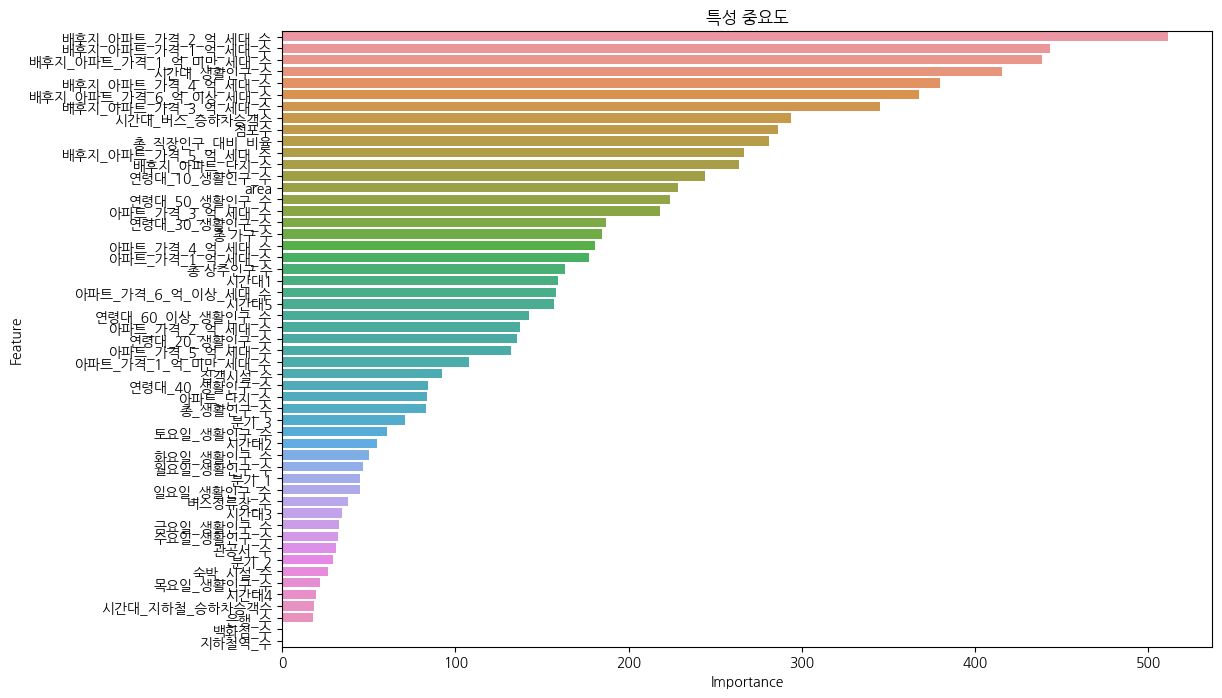

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 2: {'objective': 'regression', 'num_leaves': 37, 'n_estimators': 215, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 43}
Fold 3: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 4: {'objective': 'regression', 'num_leaves': 37, 'n_estimators': 215, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 43}
Fold 5: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}


In [22]:
#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_대비_비율', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수','시간대_생활인구_수', 
        '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
       '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수']
X = data5[features]
y = data5['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

## 8. 아파트 세대수들의 단순 합(배후지는 미실시)

In [23]:
data6 = pd.read_csv('data/골목상권_데이터230914.csv')

# 주어진 칼럼들의 합 구하기
data6['총_세대_수'] = data6[['아파트_가격_1_억_미만_세대_수', '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', 
               '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수', '아파트_가격_5_억_세대_수', 
               '아파트_가격_6_억_이상_세대_수']].sum(axis=1)

# 주어진 칼럼들 삭제
data6 = data6.drop(columns=['아파트_가격_1_억_미만_세대_수', '아파트_가격_1_억_세대_수', 
                              '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', 
                              '아파트_가격_4_억_세대_수', '아파트_가격_5_억_세대_수', 
                              '아파트_가격_6_억_이상_세대_수'])
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   매출                      2472 non-null   float64
 1   기준_년_코드                 2472 non-null   int64  
 2   상권_구분_코드_명              2472 non-null   object 
 3   상권_코드                   2472 non-null   int64  
 4   상권_코드_명                 2472 non-null   object 
 5   점포수                     2472 non-null   int64  
 6   시간대1                    2472 non-null   int64  
 7   시간대2                    2472 non-null   int64  
 8   시간대3                    2472 non-null   int64  
 9   시간대4                    2472 non-null   int64  
 10  시간대5                    2472 non-null   int64  
 11  분기_1                    2472 non-null   int64  
 12  분기_2                    2472 non-null   int64  
 13  분기_3                    2472 non-null   int64  
 14  총 상주인구 수                2472 non-null   

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 151870	training's l2: 2.30644e+10	valid_1's rmse: 140300	valid_1's l2: 1.9684e+10
[2]	training's rmse: 147406	training's l2: 2.17285e+10	valid_1's rmse: 136620	valid_1's l2: 1.8665e+10
[3]	training's rmse: 143173	training's l2: 2.04986e+10	valid_1's rmse: 133107	valid_1's l2: 1.77175e+10
[4]	training's rmse: 139161	training's l2: 1.93659e+10	valid_1's rmse: 129865	valid_1's l2: 1.68649e+10
[5]	training's rmse: 135362	training's l2: 1.8323e+10	valid_1's rmse: 126689	valid_1's l2: 1.605e+10
[6]	training's rmse: 131755	training's l2: 1.73593e+10	valid_1's rmse: 123711	valid_1's l2: 1.53043e+10
[7]	training's rmse: 128298	training's l2: 1.64603e+10	valid_1's rmse: 120886	valid_1's l2: 1.46134e+10
[8]	training's rmse: 125047	training's l2: 1.56367e+10	valid_1's rmse: 118147	vali

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 142973	training's l2: 2.04412e+10	valid_1's rmse: 175558	valid_1's l2: 3.08205e+10
[2]	training's rmse: 138949	training's l2: 1.93069e+10	valid_1's rmse: 171045	valid_1's l2: 2.92563e+10
[3]	training's rmse: 135130	training's l2: 1.82601e+10	valid_1's rmse: 166770	valid_1's l2: 2.78124e+10
[4]	training's rmse: 131489	training's l2: 1.72893e+10	valid_1's rmse: 162674	valid_1's l2: 2.6463e+10
[5]	training's rmse: 127960	training's l2: 1.63737e+10	valid_1's rmse: 158708	valid_1's l2: 2.51882e+10
[6]	training's rmse: 124632	training's l2: 1.55331e+10	valid_1's rmse: 155044	valid_1's l2: 2.40386e+10
[7]	training's rmse: 121483	training's l2: 1.47581e+10	valid_1's rmse: 151535	valid_1's l2: 2.29627e+10
[8]	training's rmse: 118489	training's l2: 1.40397e+10	valid_1's rmse: 148343	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 146834	training's l2: 2.15602e+10	valid_1's rmse: 161252	valid_1's l2: 2.60022e+10
[2]	training's rmse: 142737	training's l2: 2.03738e+10	valid_1's rmse: 157201	valid_1's l2: 2.47121e+10
[3]	training's rmse: 138773	training's l2: 1.92581e+10	valid_1's rmse: 153287	valid_1's l2: 2.34968e+10
[4]	training's rmse: 135008	training's l2: 1.82272e+10	valid_1's rmse: 149731	valid_1's l2: 2.24195e+10
[5]	training's rmse: 131320	training's l2: 1.7245e+10	valid_1's rmse: 146404	valid_1's l2: 2.14342e+10
[6]	training's rmse: 127883	training's l2: 1.6354e+10	valid_1's rmse: 143119	valid_1's l2: 2.0483e+10
[7]	training's rmse: 124466	training's l2: 1.54918e+10	valid_1's rmse: 140035	valid_1's l2: 1.96099e+10
[8]	training's rmse: 121200	training's l2: 1.46893e+10	valid_1's rmse: 137245	va

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 153905	training's l2: 2.36868e+10	valid_1's rmse: 131449	valid_1's l2: 1.72788e+10
[2]	training's rmse: 149405	training's l2: 2.23217e+10	valid_1's rmse: 127590	valid_1's l2: 1.62792e+10
[3]	training's rmse: 145108	training's l2: 2.10564e+10	valid_1's rmse: 124011	valid_1's l2: 1.53788e+10
[4]	training's rmse: 141015	training's l2: 1.98851e+10	valid_1's rmse: 120613	valid_1's l2: 1.45476e+10
[5]	training's rmse: 137149	training's l2: 1.88098e+10	valid_1's rmse: 117447	valid_1's l2: 1.37937e+10
[6]	training's rmse: 133703	training's l2: 1.78765e+10	valid_1's rmse: 114494	valid_1's l2: 1.31089e+10
[7]	training's rmse: 130190	training's l2: 1.69494e+10	valid_1's rmse: 111422	valid_1's l2: 1.24149e+10
[8]	training's rmse: 126810	training's l2: 1.60809e+10	valid_1's rmse: 108546

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 150982	training's l2: 2.27955e+10	valid_1's rmse: 136623	valid_1's l2: 1.86658e+10
[2]	training's rmse: 145326	training's l2: 2.11196e+10	valid_1's rmse: 131603	valid_1's l2: 1.73195e+10
[3]	training's rmse: 140021	training's l2: 1.96059e+10	valid_1's rmse: 126924	valid_1's l2: 1.61097e+10
[4]	training's rmse: 135079	training's l2: 1.82462e+10	valid_1's rmse: 122446	valid_1's l2: 1.49929e+10
[5]	training's rmse: 130656	training's l2: 1.70711e+10	valid_1's rmse: 118215	valid_1's l2: 1.39748e+10
[6]	training's rmse: 126170	training's l2: 1.59188e+10	valid_1's rmse: 114108	valid_1's l2: 1.30206e+10
[7]	training's rmse: 122074	training's l2: 1.4902e+10	valid_1's rmse: 110576	valid_1's l2: 1.2227e+10
[8]	training's rmse: 118216	training's l2: 1.3975e+10	valid_1's rmse: 106974	va

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 49044.491696868194
평균 MAE: 29426.206890980924
                   Feature  Importance
24     배후지_아파트_가격_2_억_세대_수       572.2
15              시간대_생활인구_수       561.6
14                총_생활인구_수       558.0
23     배후지_아파트_가격_1_억_세대_수       540.6
22  배후지_아파트_가격_1_억_미만_세대_수       521.2
12                총_직장인구_수       475.8
8                     area       460.8
28  배후지_아파트_가격_6_억_이상_세대_수       454.8
26     배후지_아파트_가격_4_억_세대_수       394.4
9                      점포수       378.4
25     배후지_아파트_가격_3_억_세대_수       360.6
10                총 상주인구 수       338.6
11                  총 가구 수       336.8
29           시간대_버스_승하차승객수       335.8
27     배후지_아파트_가격_5_억_세대_수       320.4
13                아파트_단지_수       312.4
21            배후지_아파트_단지_수       291.8
33                  총_세대_수       211.8
16                  집객시설_수       177.0
0                     시간대1       171.8
4                     시간대5       168.6
17                   관공서_수        78.8
7                     분기_3        66.0
20       

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


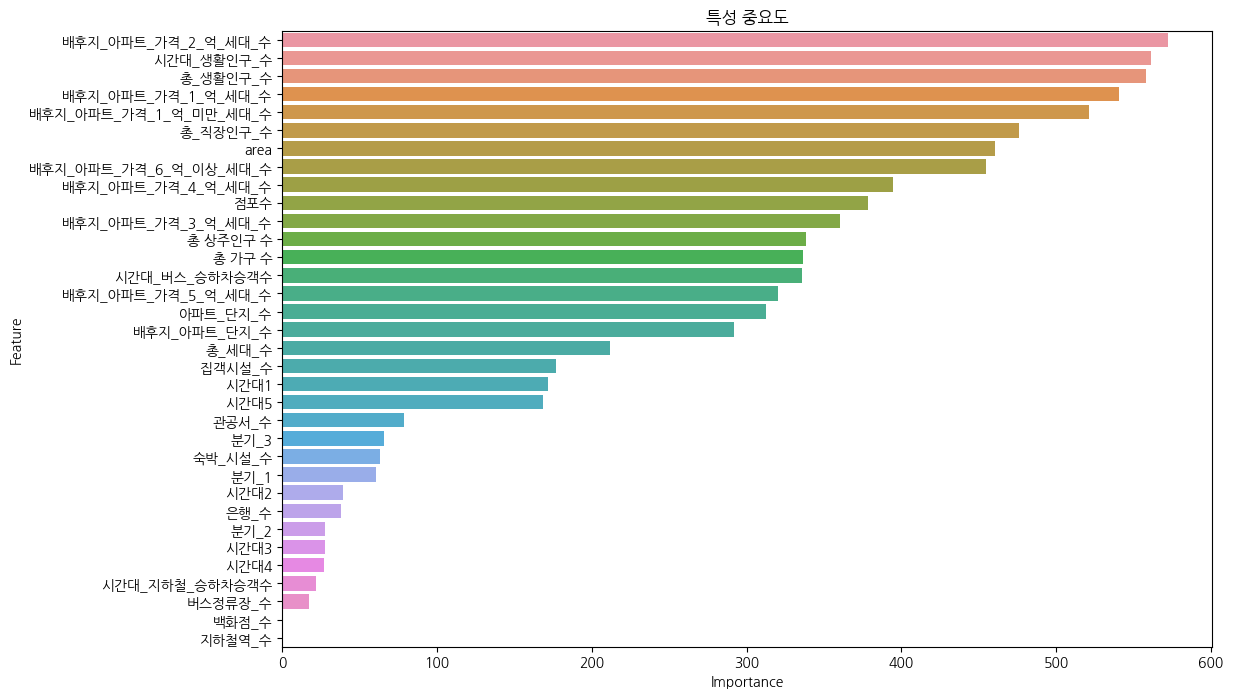

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 2: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 3: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 4: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 5: {'objective': 'regression', 'num_leaves': 37, 'n_estimators': 215, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 43}


In [24]:
#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '총_생활인구_수','시간대_생활인구_수',
        '집객시설_수', '관공서_수', '은행_수', '백화점_수', '숙박_시설_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수', '총_세대_수']
X = data6[features]
y = data6['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

## 9. 아파트 세대 수들의 단순 합(배후지까지)

In [25]:
# 주어진 칼럼들의 합 구하기
data6['총_배후지_세대_수'] = data6[['배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수']].sum(axis=1)

# 주어진 칼럼들 삭제
data6 = data6.drop(columns=['배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수'])
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   매출                2472 non-null   float64
 1   기준_년_코드           2472 non-null   int64  
 2   상권_구분_코드_명        2472 non-null   object 
 3   상권_코드             2472 non-null   int64  
 4   상권_코드_명           2472 non-null   object 
 5   점포수               2472 non-null   int64  
 6   시간대1              2472 non-null   int64  
 7   시간대2              2472 non-null   int64  
 8   시간대3              2472 non-null   int64  
 9   시간대4              2472 non-null   int64  
 10  시간대5              2472 non-null   int64  
 11  분기_1              2472 non-null   int64  
 12  분기_2              2472 non-null   int64  
 13  분기_3              2472 non-null   int64  
 14  총 상주인구 수          2472 non-null   int64  
 15  총 가구 수            2472 non-null   int64  
 16  총_직장인구_수          2472 non-null   int64  


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 150500	training's l2: 2.26502e+10	valid_1's rmse: 138995	valid_1's l2: 1.93197e+10
[2]	training's rmse: 144804	training's l2: 2.09682e+10	valid_1's rmse: 134101	valid_1's l2: 1.7983e+10
[3]	training's rmse: 139486	training's l2: 1.94564e+10	valid_1's rmse: 129559	valid_1's l2: 1.67856e+10
[4]	training's rmse: 134485	training's l2: 1.80862e+10	valid_1's rmse: 125293	valid_1's l2: 1.56984e+10
[5]	training's rmse: 129789	training's l2: 1.68451e+10	valid_1's rmse: 121222	valid_1's l2: 1.46948e+10
[6]	training's rmse: 125388	training's l2: 1.57222e+10	valid_1's rmse: 117437	valid_1's l2: 1.37915e+10
[7]	training's rmse: 121256	training's l2: 1.47031e+10	valid_1's rmse: 113886	valid_1's l2: 1.29701e+10
[8]	training's rmse: 117409	training's l2: 1.37849e+10	valid_1's rmse: 110585	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 141686	training's l2: 2.00749e+10	valid_1's rmse: 174684	valid_1's l2: 3.05146e+10
[2]	training's rmse: 136626	training's l2: 1.86667e+10	valid_1's rmse: 169015	valid_1's l2: 2.85662e+10
[3]	training's rmse: 131850	training's l2: 1.73843e+10	valid_1's rmse: 163681	valid_1's l2: 2.67916e+10
[4]	training's rmse: 127324	training's l2: 1.62115e+10	valid_1's rmse: 158797	valid_1's l2: 2.52166e+10
[5]	training's rmse: 123101	training's l2: 1.51537e+10	valid_1's rmse: 154708	valid_1's l2: 2.39346e+10
[6]	training's rmse: 118970	training's l2: 1.41539e+10	valid_1's rmse: 150216	valid_1's l2: 2.25649e+10
[7]	training's rmse: 115140	training's l2: 1.32572e+10	valid_1's rmse: 146128	valid_1's l2: 2.13533e+10
[8]	training's rmse: 111350	training's l2: 1.23988e+10	valid_1's rmse: 142015

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 145694	training's l2: 2.12268e+10	valid_1's rmse: 160330	valid_1's l2: 2.57058e+10
[2]	training's rmse: 140600	training's l2: 1.97683e+10	valid_1's rmse: 155545	valid_1's l2: 2.41942e+10
[3]	training's rmse: 135305	training's l2: 1.83076e+10	valid_1's rmse: 150424	valid_1's l2: 2.26274e+10
[4]	training's rmse: 130641	training's l2: 1.70672e+10	valid_1's rmse: 146054	valid_1's l2: 2.13318e+10
[5]	training's rmse: 126046	training's l2: 1.58876e+10	valid_1's rmse: 141873	valid_1's l2: 2.0128e+10
[6]	training's rmse: 121948	training's l2: 1.48713e+10	valid_1's rmse: 138021	valid_1's l2: 1.90498e+10
[7]	training's rmse: 117758	training's l2: 1.38669e+10	valid_1's rmse: 134233	valid_1's l2: 1.80186e+10
[8]	training's rmse: 114028	training's l2: 1.30024e+10	valid_1's rmse: 130762	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 154009	training's l2: 2.37188e+10	valid_1's rmse: 131491	valid_1's l2: 1.72898e+10
[2]	training's rmse: 149496	training's l2: 2.23491e+10	valid_1's rmse: 127626	valid_1's l2: 1.62883e+10
[3]	training's rmse: 145467	training's l2: 2.11606e+10	valid_1's rmse: 124116	valid_1's l2: 1.54048e+10
[4]	training's rmse: 141369	training's l2: 1.99851e+10	valid_1's rmse: 120461	valid_1's l2: 1.45109e+10
[5]	training's rmse: 137454	training's l2: 1.88937e+10	valid_1's rmse: 117169	valid_1's l2: 1.37285e+10
[6]	training's rmse: 133754	training's l2: 1.789e+10	valid_1's rmse: 113938	valid_1's l2: 1.29819e+10
[7]	training's rmse: 130164	training's l2: 1.69426e+10	valid_1's rmse: 110913	valid_1's l2: 1.23017e+10
[8]	training's rmse: 126905	training's l2: 1.6105e+10	valid_1's rmse: 108052	va

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 150987	training's l2: 2.2797e+10	valid_1's rmse: 136532	valid_1's l2: 1.8641e+10
[2]	training's rmse: 145329	training's l2: 2.11204e+10	valid_1's rmse: 131479	valid_1's l2: 1.72868e+10
[3]	training's rmse: 140029	training's l2: 1.9608e+10	valid_1's rmse: 126758	valid_1's l2: 1.60676e+10
[4]	training's rmse: 135038	training's l2: 1.82353e+10	valid_1's rmse: 122311	valid_1's l2: 1.49601e+10
[5]	training's rmse: 130339	training's l2: 1.69881e+10	valid_1's rmse: 117838	valid_1's l2: 1.38858e+10
[6]	training's rmse: 125892	training's l2: 1.58487e+10	valid_1's rmse: 113449	valid_1's l2: 1.28706e+10
[7]	training's rmse: 121728	training's l2: 1.48177e+10	valid_1's rmse: 109389	valid_1's l2: 1.1966e+10
[8]	training's rmse: 117872	training's l2: 1.38938e+10	valid_1's rmse: 105823	val

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 46918.11666103564
평균 MAE: 26937.131032328798
           Feature  Importance
15      시간대_생활인구_수      1695.2
27      총_배후지_세대_수      1686.0
21    배후지_아파트_단지_수      1611.6
14        총_생활인구_수      1433.8
8             area       827.4
9              점포수       698.2
12        총_직장인구_수       685.4
10        총 상주인구 수       668.8
11          총 가구 수       590.2
13        아파트_단지_수       575.4
22   시간대_버스_승하차승객수       538.0
26          총_세대_수       488.2
16          집객시설_수       354.2
4             시간대5       280.6
0             시간대1       267.2
1             시간대2       146.6
7             분기_3       142.8
2             시간대3       130.8
5             분기_1       119.6
20         숙박_시설_수       104.8
17           관공서_수        97.6
3             시간대4        93.2
6             분기_2        85.8
23  시간대_지하철_승하차승객수        49.8
24         버스정류장_수        45.2
18            은행_수        28.6
19           백화점_수         0.0
25          지하철역_수         0.0


C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


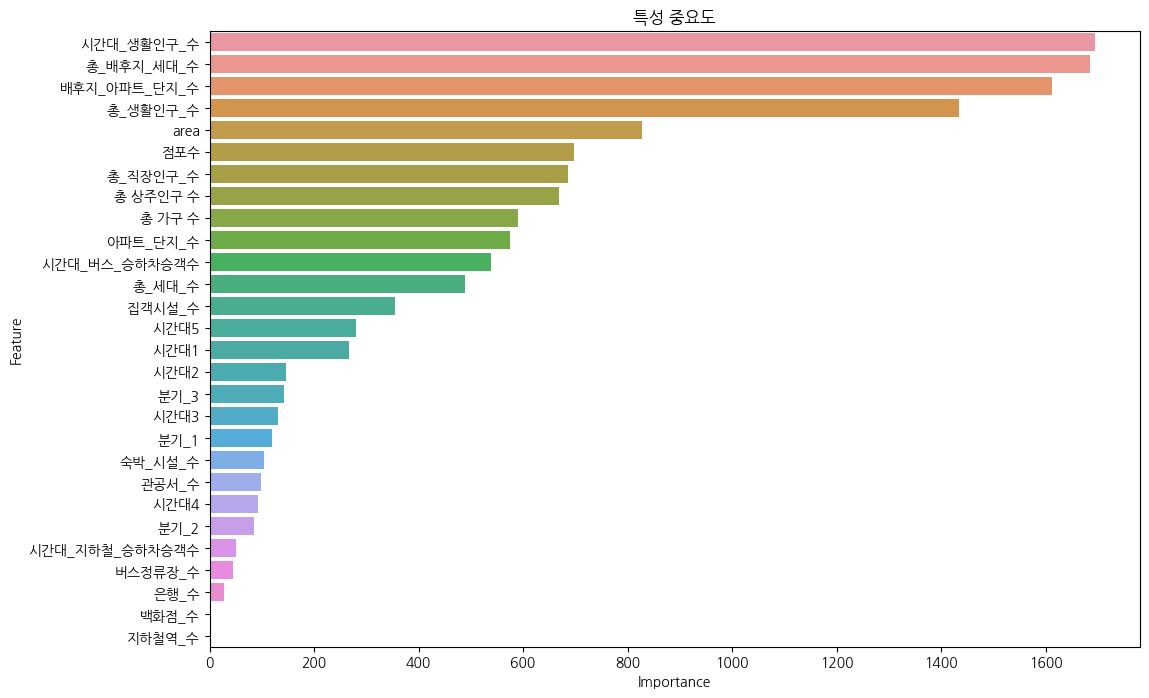

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 2: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 3: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 4: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 5: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}


In [26]:
#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '총_생활인구_수','시간대_생활인구_수',
        '집객시설_수', '관공서_수', '은행_수', '백화점_수', '숙박_시설_수', '배후지_아파트_단지_수',
       '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수', '지하철역_수', '총_세대_수',  '총_배후지_세대_수']

X = data6[features]
y = data6['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

## 10. 아파트 세대 수들의 단순 합(배후지만)

In [27]:
data7 = pd.read_csv('data/골목상권_데이터230914.csv')

# 주어진 칼럼들의 합 구하기
data7['총_배후지_세대_수'] = data7[['배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수']].sum(axis=1)

# 주어진 칼럼들 삭제
data7 = data7.drop(columns=['배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수'])

data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   매출                  2472 non-null   float64
 1   기준_년_코드             2472 non-null   int64  
 2   상권_구분_코드_명          2472 non-null   object 
 3   상권_코드               2472 non-null   int64  
 4   상권_코드_명             2472 non-null   object 
 5   점포수                 2472 non-null   int64  
 6   시간대1                2472 non-null   int64  
 7   시간대2                2472 non-null   int64  
 8   시간대3                2472 non-null   int64  
 9   시간대4                2472 non-null   int64  
 10  시간대5                2472 non-null   int64  
 11  분기_1                2472 non-null   int64  
 12  분기_2                2472 non-null   int64  
 13  분기_3                2472 non-null   int64  
 14  총 상주인구 수            2472 non-null   int64  
 15  총 가구 수              2472 non-null   int64  
 16  총_직장인구

In [24]:
# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수','시간대_생활인구_수', 
        '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
       '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '배후지_아파트_단지_수',
        '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수', '지하철역_수', '총_배후지_세대_수']

X = data7[features]
y = data7['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

NameError: name 'data7' is not defined

## 11. 직장/상주인구 해보기

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 151908	training's l2: 2.30762e+10	valid_1's rmse: 140276	valid_1's l2: 1.96775e+10
[2]	training's rmse: 147410	training's l2: 2.17296e+10	valid_1's rmse: 136367	valid_1's l2: 1.85959e+10
[3]	training's rmse: 143140	training's l2: 2.04889e+10	valid_1's rmse: 132650	valid_1's l2: 1.7596e+10
[4]	training's rmse: 139072	training's l2: 1.9341e+10	valid_1's rmse: 129148	valid_1's l2: 1.66793e+10
[5]	training's rmse: 135203	training's l2: 1.828e+10	valid_1's rmse: 125950	valid_1's l2: 1.58634e+10
[6]	training's rmse: 131572	training's l2: 1.73113e+10	valid_1's rmse: 122876	valid_1's l2: 1.50985e+10
[7]	training's rmse: 128073	training's l2: 1.64026e+10	valid_1's rmse: 119879	valid_1's l2: 1.43711e+10
[8]	training's rmse: 124572	training's l2: 1.55182e+10	valid_1's rmse: 116966	val

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 141570	training's l2: 2.00419e+10	valid_1's rmse: 174021	valid_1's l2: 3.02833e+10
[2]	training's rmse: 136426	training's l2: 1.86121e+10	valid_1's rmse: 168423	valid_1's l2: 2.83662e+10
[3]	training's rmse: 131588	training's l2: 1.73154e+10	valid_1's rmse: 163103	valid_1's l2: 2.66024e+10
[4]	training's rmse: 127080	training's l2: 1.61494e+10	valid_1's rmse: 158137	valid_1's l2: 2.50072e+10
[5]	training's rmse: 122684	training's l2: 1.50515e+10	valid_1's rmse: 153293	valid_1's l2: 2.34986e+10
[6]	training's rmse: 118411	training's l2: 1.40212e+10	valid_1's rmse: 148718	valid_1's l2: 2.2117e+10
[7]	training's rmse: 114465	training's l2: 1.31022e+10	valid_1's rmse: 144773	valid_1's l2: 2.09592e+10
[8]	training's rmse: 110781	training's l2: 1.22725e+10	valid_1's rmse: 141122	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 146803	training's l2: 2.1551e+10	valid_1's rmse: 161663	valid_1's l2: 2.61349e+10
[2]	training's rmse: 142676	training's l2: 2.03564e+10	valid_1's rmse: 158045	valid_1's l2: 2.49784e+10
[3]	training's rmse: 138617	training's l2: 1.92147e+10	valid_1's rmse: 154033	valid_1's l2: 2.37263e+10
[4]	training's rmse: 134803	training's l2: 1.81717e+10	valid_1's rmse: 150249	valid_1's l2: 2.25748e+10
[5]	training's rmse: 131149	training's l2: 1.72002e+10	valid_1's rmse: 146698	valid_1's l2: 2.15203e+10
[6]	training's rmse: 127683	training's l2: 1.6303e+10	valid_1's rmse: 143314	valid_1's l2: 2.05389e+10
[7]	training's rmse: 124279	training's l2: 1.54451e+10	valid_1's rmse: 140063	valid_1's l2: 1.96178e+10
[8]	training's rmse: 120985	training's l2: 1.46373e+10	valid_1's rmse: 137197	v

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 153941	training's l2: 2.36978e+10	valid_1's rmse: 131486	valid_1's l2: 1.72885e+10
[2]	training's rmse: 149339	training's l2: 2.2302e+10	valid_1's rmse: 127494	valid_1's l2: 1.62547e+10
[3]	training's rmse: 145048	training's l2: 2.10391e+10	valid_1's rmse: 123766	valid_1's l2: 1.5318e+10
[4]	training's rmse: 140930	training's l2: 1.98614e+10	valid_1's rmse: 120274	valid_1's l2: 1.44658e+10
[5]	training's rmse: 136941	training's l2: 1.87528e+10	valid_1's rmse: 116864	valid_1's l2: 1.36571e+10
[6]	training's rmse: 133231	training's l2: 1.77506e+10	valid_1's rmse: 113762	valid_1's l2: 1.29417e+10
[7]	training's rmse: 129838	training's l2: 1.68578e+10	valid_1's rmse: 110844	valid_1's l2: 1.22865e+10
[8]	training's rmse: 126384	training's l2: 1.5973e+10	valid_1's rmse: 107914	va

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 152433	training's l2: 2.32359e+10	valid_1's rmse: 137954	valid_1's l2: 1.90312e+10
[2]	training's rmse: 147973	training's l2: 2.18959e+10	valid_1's rmse: 133913	valid_1's l2: 1.79328e+10
[3]	training's rmse: 143820	training's l2: 2.06841e+10	valid_1's rmse: 130236	valid_1's l2: 1.69614e+10
[4]	training's rmse: 139789	training's l2: 1.95408e+10	valid_1's rmse: 126634	valid_1's l2: 1.60361e+10
[5]	training's rmse: 135932	training's l2: 1.84774e+10	valid_1's rmse: 123074	valid_1's l2: 1.51473e+10
[6]	training's rmse: 132267	training's l2: 1.74946e+10	valid_1's rmse: 119785	valid_1's l2: 1.43485e+10
[7]	training's rmse: 128848	training's l2: 1.66019e+10	valid_1's rmse: 116889	valid_1's l2: 1.36631e+10
[8]	training's rmse: 125583	training's l2: 1.57711e+10	valid_1's rmse: 114313

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 51470.08127731393
평균 MAE: 29946.614839542115
                   Feature  Importance
29     배후지_아파트_가격_2_억_세대_수       691.4
28     배후지_아파트_가격_1_억_세대_수       629.6
20              시간대_생활인구_수       622.6
38               직장인구/생활인구       555.0
27  배후지_아파트_가격_1_억_미만_세대_수       545.8
33  배후지_아파트_가격_6_억_이상_세대_수       541.4
31     배후지_아파트_가격_4_억_세대_수       506.6
30     배후지_아파트_가격_3_억_세대_수       490.8
32     배후지_아파트_가격_5_억_세대_수       413.0
9                      점포수       374.0
8                     area       370.4
34           시간대_버스_승하차승객수       361.0
26            배후지_아파트_단지_수       353.6
16         아파트_가격_3_억_세대_수       346.0
14         아파트_가격_1_억_세대_수       283.0
19      아파트_가격_6_억_이상_세대_수       272.0
17         아파트_가격_4_억_세대_수       246.2
15         아파트_가격_2_억_세대_수       230.8
10                총 상주인구 수       224.2
18         아파트_가격_5_억_세대_수       215.8
11                  총 가구 수       208.6
0                     시간대1       184.8
12                아파트_단지_수       180.6
4         

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


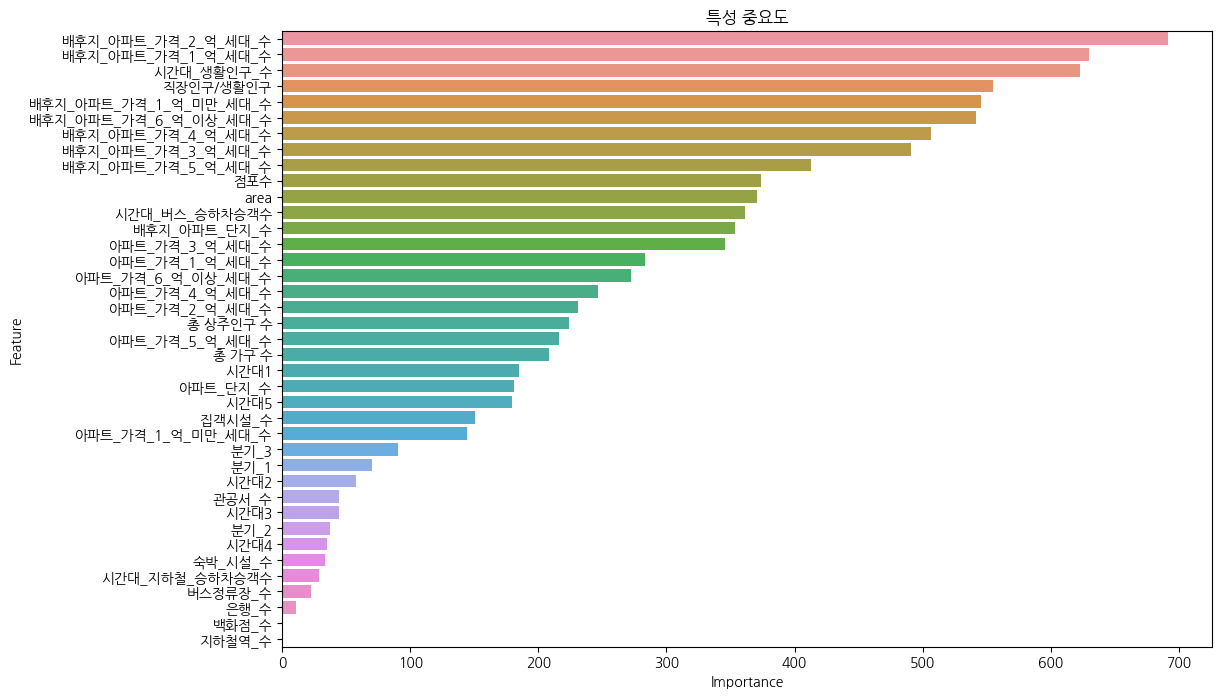

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 2: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 3: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 4: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 5: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}


In [29]:
data8 = pd.read_csv('data/골목상권_데이터230914.csv')

data8['직장인구/생활인구'] = data8['총_직장인구_수'] / data8['총_생활인구_수']

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '시간대_생활인구_수',
        '집객시설_수', '관공서_수', '은행_수', '백화점_수', '숙박_시설_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수', '직장인구/생활인구']

X = data8[features]
y = data8['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 5
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

# 초반보다 못하다니 . . . 

In [56]:
df_f = pd.read_csv('data/Final/20230911_인코딩완료.csv')
data11 = df_f[df_f['상권_구분_코드_명'] == '골목상권']

In [57]:
# 월요일부터 금요일까지의 생활인구 수 컬럼 이름
columns_to_sum1 = ['월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수', '금요일_생활인구_수']
columns_to_sum2 = ['토요일_생활인구_수', '일요일_생활인구_수']

# data3 데이터프레임에서 해당 컬럼을 더하고 각 5, 2로 나누어서 평일, 주말 생활인구수 컬럼 생성
data11['평일_생활인구_평균'] = data11[columns_to_sum1].sum(axis=1) / 5
data11['주말_생활인구_평균'] = data11[columns_to_sum2].sum(axis=1) / 2

data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   매출                      2472 non-null   float64
 1   기준_년_코드                 2472 non-null   int64  
 2   상권_구분_코드_명              2472 non-null   object 
 3   상권_코드                   2472 non-null   int64  
 4   상권_코드_명                 2472 non-null   object 
 5   시간대1                    2472 non-null   int64  
 6   시간대2                    2472 non-null   int64  
 7   시간대3                    2472 non-null   int64  
 8   시간대4                    2472 non-null   int64  
 9   시간대5                    2472 non-null   int64  
 10  분기_1                    2472 non-null   int64  
 11  분기_2                    2472 non-null   int64  
 12  분기_3                    2472 non-null   int64  
 13  area                    2472 non-null   int64  
 14  점포수                     2472 non-null   

C:\Users\user\AppData\Local\Temp\ipykernel_22564\3766307628.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data11['평일_생활인구_평균'] = data11[columns_to_sum1].sum(axis=1) / 5
C:\Users\user\AppData\Local\Temp\ipykernel_22564\3766307628.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data11['주말_생활인구_평균'] = data11[columns_to_sum2].sum(axis=1) / 2


In [58]:
data11 = data11.drop(['월요일_생활인구_수','화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수', '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수'], axis=1)
data11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2472 entries, 0 to 5479
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   매출                      2472 non-null   float64
 1   기준_년_코드                 2472 non-null   int64  
 2   상권_구분_코드_명              2472 non-null   object 
 3   상권_코드                   2472 non-null   int64  
 4   상권_코드_명                 2472 non-null   object 
 5   점포수                     2472 non-null   int64  
 6   시간대1                    2472 non-null   int64  
 7   시간대2                    2472 non-null   int64  
 8   시간대3                    2472 non-null   int64  
 9   시간대4                    2472 non-null   int64  
 10  시간대5                    2472 non-null   int64  
 11  분기_1                    2472 non-null   int64  
 12  분기_2                    2472 non-null   int64  
 13  분기_3                    2472 non-null   int64  
 14  총 상주인구 수                2472 non-null   int64

In [47]:
data11 = data11.drop(
    ['area', '총_생활인구_수', '관공서_수', '은행_수', '백화점_수', 
     '숙박_시설_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수',
     '연령대_30_생활인구_수', '연령대_40_생활인구_수', '연령대_50_생활인구_수',
     '연령대_60_이상_생활인구_수', '시간대_지하철_승하차승객수', '버스정류장_수', '지하철역_수'], axis=1)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 151027	training's l2: 2.28091e+10	valid_1's rmse: 120558	valid_1's l2: 1.45343e+10
[2]	training's rmse: 145429	training's l2: 2.11495e+10	valid_1's rmse: 115796	valid_1's l2: 1.34086e+10
[3]	training's rmse: 140164	training's l2: 1.96459e+10	valid_1's rmse: 111266	valid_1's l2: 1.23801e+10
[4]	training's rmse: 135304	training's l2: 1.83071e+10	valid_1's rmse: 107129	valid_1's l2: 1.14765e+10
[5]	training's rmse: 130596	training's l2: 1.70554e+10	valid_1's rmse: 103274	valid_1's l2: 1.06654e+10
[6]	training's rmse: 125919	training's l2: 1.58556e+10	valid_1's rmse: 99255.1	valid_1's l2: 9.85158e+09
[7]	training's rmse: 121664	training's l2: 1.48021e+10	valid_1's rmse: 95684.8	valid_1's l2: 9.15559e+09
[8]	training's rmse: 117619	training's l2: 1.38343e+10	valid_1's rmse: 92

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 147713	training's l2: 2.18191e+10	valid_1's rmse: 154439	valid_1's l2: 2.38514e+10
[2]	training's rmse: 142338	training's l2: 2.02602e+10	valid_1's rmse: 148710	valid_1's l2: 2.21147e+10
[3]	training's rmse: 137279	training's l2: 1.88457e+10	valid_1's rmse: 143616	valid_1's l2: 2.06254e+10
[4]	training's rmse: 132552	training's l2: 1.75701e+10	valid_1's rmse: 138702	valid_1's l2: 1.92383e+10
[5]	training's rmse: 128119	training's l2: 1.64146e+10	valid_1's rmse: 134057	valid_1's l2: 1.79713e+10
[6]	training's rmse: 123671	training's l2: 1.52946e+10	valid_1's rmse: 129832	valid_1's l2: 1.68565e+10
[7]	training's rmse: 119536	training's l2: 1.42888e+10	valid_1's rmse: 125979	valid_1's l2: 1.58706e+10
[8]	training's rmse: 115628	training's l2: 1.33698e+10	valid_1's rmse: 1222

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 143946	training's l2: 2.07205e+10	valid_1's rmse: 184006	valid_1's l2: 3.3858e+10
[2]	training's rmse: 138633	training's l2: 1.9219e+10	valid_1's rmse: 178146	valid_1's l2: 3.1736e+10
[3]	training's rmse: 133651	training's l2: 1.78626e+10	valid_1's rmse: 172718	valid_1's l2: 2.98314e+10
[4]	training's rmse: 128915	training's l2: 1.66191e+10	valid_1's rmse: 167570	valid_1's l2: 2.80799e+10
[5]	training's rmse: 124586	training's l2: 1.55218e+10	valid_1's rmse: 162896	valid_1's l2: 2.6535e+10
[6]	training's rmse: 120359	training's l2: 1.44862e+10	valid_1's rmse: 158198	valid_1's l2: 2.50266e+10
[7]	training's rmse: 116528	training's l2: 1.35787e+10	valid_1's rmse: 154052	valid_1's l2: 2.37321e+10
[8]	training's rmse: 112964	training's l2: 1.27609e+10	valid_1's rmse: 150209	v

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 146551	training's l2: 2.14771e+10	valid_1's rmse: 161833	valid_1's l2: 2.61898e+10
[2]	training's rmse: 141009	training's l2: 1.98835e+10	valid_1's rmse: 155595	valid_1's l2: 2.42097e+10
[3]	training's rmse: 135668	training's l2: 1.84058e+10	valid_1's rmse: 149648	valid_1's l2: 2.23945e+10
[4]	training's rmse: 130665	training's l2: 1.70732e+10	valid_1's rmse: 144072	valid_1's l2: 2.07567e+10
[5]	training's rmse: 125832	training's l2: 1.58337e+10	valid_1's rmse: 138984	valid_1's l2: 1.93165e+10
[6]	training's rmse: 121287	training's l2: 1.47104e+10	valid_1's rmse: 134022	valid_1's l2: 1.79618e+10
[7]	training's rmse: 117186	training's l2: 1.37325e+10	valid_1's rmse: 129652	valid_1's l2: 1.68097e+10
[8]	training's rmse: 113132	training's l2: 1.27988e+10	valid_1's rmse: 1256

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 147564	training's l2: 2.17753e+10	valid_1's rmse: 156937	valid_1's l2: 2.46292e+10
[2]	training's rmse: 142252	training's l2: 2.02356e+10	valid_1's rmse: 152318	valid_1's l2: 2.32006e+10
[3]	training's rmse: 137266	training's l2: 1.88419e+10	valid_1's rmse: 148017	valid_1's l2: 2.1909e+10
[4]	training's rmse: 132376	training's l2: 1.75233e+10	valid_1's rmse: 144026	valid_1's l2: 2.07436e+10
[5]	training's rmse: 127800	training's l2: 1.63329e+10	valid_1's rmse: 138844	valid_1's l2: 1.92776e+10
[6]	training's rmse: 123395	training's l2: 1.52262e+10	valid_1's rmse: 134029	valid_1's l2: 1.79639e+10
[7]	training's rmse: 119245	training's l2: 1.42193e+10	valid_1's rmse: 130791	valid_1's l2: 1.71062e+10
[8]	training's rmse: 115320	training's l2: 1.32986e+10	valid_1's rmse: 12710

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 146701	training's l2: 2.15211e+10	valid_1's rmse: 163786	valid_1's l2: 2.68259e+10
[2]	training's rmse: 141361	training's l2: 1.9983e+10	valid_1's rmse: 159104	valid_1's l2: 2.5314e+10
[3]	training's rmse: 136261	training's l2: 1.85672e+10	valid_1's rmse: 154151	valid_1's l2: 2.37626e+10
[4]	training's rmse: 131479	training's l2: 1.72868e+10	valid_1's rmse: 150009	valid_1's l2: 2.25027e+10
[5]	training's rmse: 126979	training's l2: 1.61238e+10	valid_1's rmse: 145726	valid_1's l2: 2.12362e+10
[6]	training's rmse: 122763	training's l2: 1.50708e+10	valid_1's rmse: 142146	valid_1's l2: 2.02054e+10
[7]	training's rmse: 118817	training's l2: 1.41174e+10	valid_1's rmse: 138088	valid_1's l2: 1.90684e+10
[8]	training's rmse: 115041	training's l2: 1.32344e+10	valid_1's rmse: 134825

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 151154	training's l2: 2.28477e+10	valid_1's rmse: 117351	valid_1's l2: 1.37712e+10
[2]	training's rmse: 145540	training's l2: 2.11818e+10	valid_1's rmse: 112373	valid_1's l2: 1.26277e+10
[3]	training's rmse: 140270	training's l2: 1.96757e+10	valid_1's rmse: 107765	valid_1's l2: 1.16132e+10
[4]	training's rmse: 135305	training's l2: 1.83073e+10	valid_1's rmse: 103684	valid_1's l2: 1.07503e+10
[5]	training's rmse: 130647	training's l2: 1.70686e+10	valid_1's rmse: 99928.8	valid_1's l2: 9.98577e+09
[6]	training's rmse: 126264	training's l2: 1.59427e+10	valid_1's rmse: 96397.5	valid_1's l2: 9.29248e+09
[7]	training's rmse: 122172	training's l2: 1.49259e+10	valid_1's rmse: 92952.8	valid_1's l2: 8.64022e+09
[8]	training's rmse: 118270	training's l2: 1.39877e+10	valid_1's rmse: 8

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 149060	training's l2: 2.2219e+10	valid_1's rmse: 142076	valid_1's l2: 2.01855e+10
[2]	training's rmse: 143584	training's l2: 2.06162e+10	valid_1's rmse: 137082	valid_1's l2: 1.87915e+10
[3]	training's rmse: 138187	training's l2: 1.90957e+10	valid_1's rmse: 131984	valid_1's l2: 1.74198e+10
[4]	training's rmse: 133104	training's l2: 1.77168e+10	valid_1's rmse: 127265	valid_1's l2: 1.61963e+10
[5]	training's rmse: 128362	training's l2: 1.64769e+10	valid_1's rmse: 122886	valid_1's l2: 1.51009e+10
[6]	training's rmse: 123959	training's l2: 1.53658e+10	valid_1's rmse: 119019	valid_1's l2: 1.41656e+10
[7]	training's rmse: 119616	training's l2: 1.43081e+10	valid_1's rmse: 115348	valid_1's l2: 1.33052e+10
[8]	training's rmse: 115522	training's l2: 1.33454e+10	valid_1's rmse: 11214

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 149124	training's l2: 2.22379e+10	valid_1's rmse: 140348	valid_1's l2: 1.96976e+10
[2]	training's rmse: 143562	training's l2: 2.061e+10	valid_1's rmse: 135456	valid_1's l2: 1.83484e+10
[3]	training's rmse: 138063	training's l2: 1.90614e+10	valid_1's rmse: 130876	valid_1's l2: 1.71284e+10
[4]	training's rmse: 133142	training's l2: 1.77267e+10	valid_1's rmse: 126627	valid_1's l2: 1.60343e+10
[5]	training's rmse: 128606	training's l2: 1.65395e+10	valid_1's rmse: 122657	valid_1's l2: 1.50448e+10
[6]	training's rmse: 124310	training's l2: 1.5453e+10	valid_1's rmse: 119087	valid_1's l2: 1.41816e+10
[7]	training's rmse: 120300	training's l2: 1.4472e+10	valid_1's rmse: 115566	valid_1's l2: 1.33554e+10
[8]	training's rmse: 116499	training's l2: 1.35719e+10	valid_1's rmse: 112278	v

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 151111	training's l2: 2.28345e+10	valid_1's rmse: 134219	valid_1's l2: 1.80148e+10
[2]	training's rmse: 146702	training's l2: 2.15215e+10	valid_1's rmse: 130332	valid_1's l2: 1.69864e+10
[3]	training's rmse: 142548	training's l2: 2.03199e+10	valid_1's rmse: 126341	valid_1's l2: 1.59621e+10
[4]	training's rmse: 138618	training's l2: 1.92149e+10	valid_1's rmse: 122726	valid_1's l2: 1.50616e+10
[5]	training's rmse: 134878	training's l2: 1.81921e+10	valid_1's rmse: 119154	valid_1's l2: 1.41977e+10
[6]	training's rmse: 131357	training's l2: 1.72548e+10	valid_1's rmse: 116039	valid_1's l2: 1.34651e+10
[7]	training's rmse: 127868	training's l2: 1.63503e+10	valid_1's rmse: 112801	valid_1's l2: 1.2724e+10
[8]	training's rmse: 124598	training's l2: 1.55248e+10	valid_1's rmse: 10974

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 42330.53996133356
평균 MAE: 22973.98012574822
                   Feature  Importance
20              시간대_생활인구_수      1821.7
21              평일_생활인구_평균       969.8
8                      점포수       692.3
22              주말_생활인구_평균       652.9
32           시간대_버스_승하차승객수       624.1
30     배후지_아파트_가격_5_억_세대_수       513.1
31  배후지_아파트_가격_6_억_이상_세대_수       458.1
28     배후지_아파트_가격_3_억_세대_수       431.8
4                     시간대5       379.6
16         아파트_가격_3_억_세대_수       379.4
26     배후지_아파트_가격_1_억_세대_수       359.4
29     배후지_아파트_가격_4_억_세대_수       338.2
17         아파트_가격_4_억_세대_수       324.2
0                     시간대1       315.5
9                 총 상주인구 수       307.7
10                  총 가구 수       305.0
11                총_직장인구_수       302.1
25  배후지_아파트_가격_1_억_미만_세대_수       301.3
19      아파트_가격_6_억_이상_세대_수       298.7
15         아파트_가격_2_억_세대_수       296.3
14         아파트_가격_1_억_세대_수       291.3
27     배후지_아파트_가격_2_억_세대_수       289.0
24            배후지_아파트_단지_수       283.4
18         

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


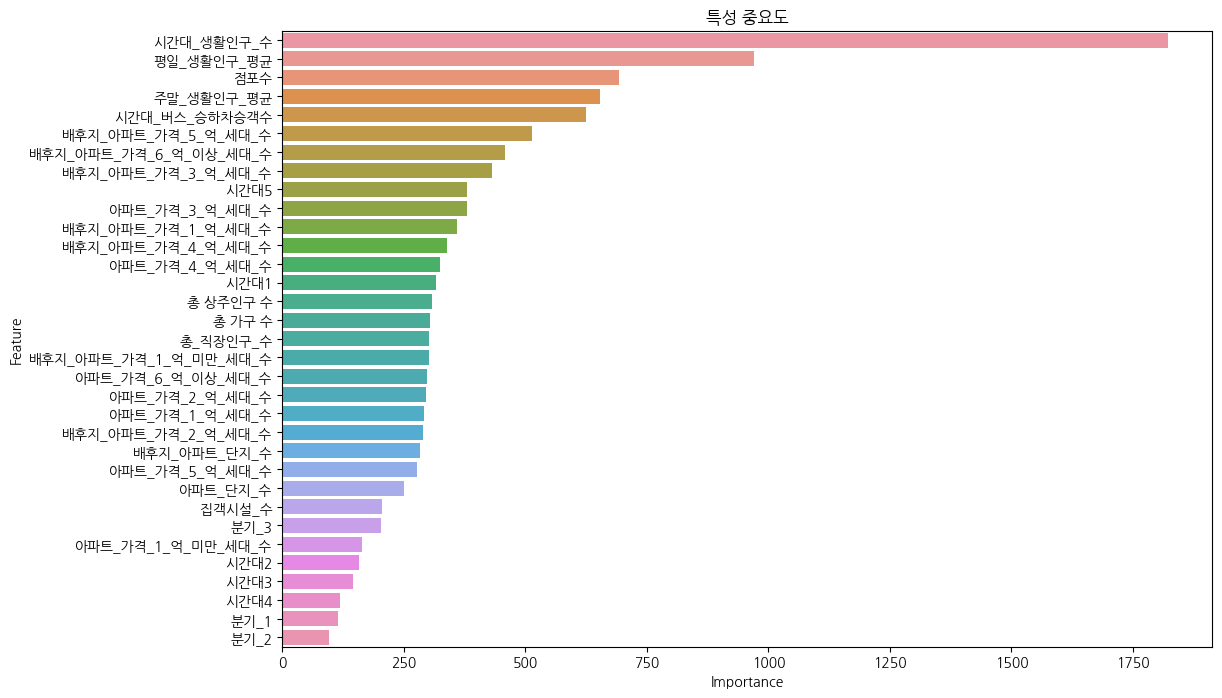

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 2: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 3: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 4: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 5: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 6: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 7: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate'

In [62]:
#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '시간대_생활인구_수', 
        '평일_생활인구_평균', '주말_생활인구_평균', '집객시설_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수']


X = data11.iloc[:, 5:]
y = data11['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 10
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

In [59]:
data11 = data11[['매출', '기준_년_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
        '시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', '점포수',
         '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
         '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
         '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '시간대_생활인구_수', 
         '평일_생활인구_평균', '주말_생활인구_평균', '집객시설_수', '배후지_아파트_단지_수',
         '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
         '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
         '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수']]

In [60]:
data11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2472 entries, 0 to 5479
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   매출                      2472 non-null   float64
 1   기준_년_코드                 2472 non-null   int64  
 2   상권_구분_코드_명              2472 non-null   object 
 3   상권_코드                   2472 non-null   int64  
 4   상권_코드_명                 2472 non-null   object 
 5   시간대1                    2472 non-null   int64  
 6   시간대2                    2472 non-null   int64  
 7   시간대3                    2472 non-null   int64  
 8   시간대4                    2472 non-null   int64  
 9   시간대5                    2472 non-null   int64  
 10  분기_1                    2472 non-null   int64  
 11  분기_2                    2472 non-null   int64  
 12  분기_3                    2472 non-null   int64  
 13  점포수                     2472 non-null   int64  
 14  총 상주인구 수                2472 non-null   int64

# 파일 저장 csv streamlit전달용

In [61]:
data11.to_csv('모델용.csv', index=False, encoding = 'utf-8 sig')

# 시뮬레이션 이상치 많이 제거

In [11]:
outlier_ind = []

Q1 = np.percentile(data3['매출'], 25)
Q3 = np.percentile(data3['매출'], 75)

IQR = Q3 - Q1
outlier_ind = data3[(data3['매출'] < Q1 - 1.5*IQR)| (data3['매출'] > Q3 + 1.5*IQR)].index

In [12]:
data3 = data3.drop(outlier_ind, axis = 0).reset_index(drop = True)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 99192.8	training's l2: 9.8392e+09	valid_1's rmse: 100043	valid_1's l2: 1.00085e+10
[2]	training's rmse: 95565.7	training's l2: 9.13281e+09	valid_1's rmse: 96820.9	valid_1's l2: 9.37428e+09
[3]	training's rmse: 92187.7	training's l2: 8.49857e+09	valid_1's rmse: 93900.7	valid_1's l2: 8.81735e+09
[4]	training's rmse: 89000.2	training's l2: 7.92103e+09	valid_1's rmse: 91126.5	valid_1's l2: 8.30405e+09
[5]	training's rmse: 85844.1	training's l2: 7.36921e+09	valid_1's rmse: 88193.9	valid_1's l2: 7.77817e+09
[6]	training's rmse: 82898.5	training's l2: 6.87216e+09	valid_1's rmse: 85396.3	valid_1's l2: 7.29252e+09
[7]	training's rmse: 80134.2	training's l2: 6.42149e+09	valid_1's rmse: 82869	valid_1's l2: 6.86727e+09
[8]	training's rmse: 77586.1	training's l2: 6.0196e+09	valid_1's 

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 99047.7	training's l2: 9.81045e+09	valid_1's rmse: 100767	valid_1's l2: 1.0154e+10
[2]	training's rmse: 95364.2	training's l2: 9.09433e+09	valid_1's rmse: 97152.7	valid_1's l2: 9.43864e+09
[3]	training's rmse: 91894.9	training's l2: 8.44467e+09	valid_1's rmse: 93527.4	valid_1's l2: 8.74738e+09
[4]	training's rmse: 88511.5	training's l2: 7.83429e+09	valid_1's rmse: 90188.8	valid_1's l2: 8.13402e+09
[5]	training's rmse: 85428.5	training's l2: 7.29803e+09	valid_1's rmse: 86957.9	valid_1's l2: 7.56168e+09
[6]	training's rmse: 82149.7	training's l2: 6.74858e+09	valid_1's rmse: 83588.4	valid_1's l2: 6.98703e+09
[7]	training's rmse: 79070.3	training's l2: 6.25211e+09	valid_1's rmse: 80449	valid_1's l2: 6.47205e+09
[8]	training's rmse: 76174.5	training's l2: 5.80255e+09	valid_1's

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 99244.7	training's l2: 9.84951e+09	valid_1's rmse: 99252.8	valid_1's l2: 9.85111e+09
[2]	training's rmse: 95602.7	training's l2: 9.13988e+09	valid_1's rmse: 96350.3	valid_1's l2: 9.28337e+09
[3]	training's rmse: 92154.2	training's l2: 8.4924e+09	valid_1's rmse: 93646.4	valid_1's l2: 8.76965e+09
[4]	training's rmse: 88902.2	training's l2: 7.9036e+09	valid_1's rmse: 90985.2	valid_1's l2: 8.27831e+09
[5]	training's rmse: 85867.3	training's l2: 7.37319e+09	valid_1's rmse: 88576.3	valid_1's l2: 7.84576e+09
[6]	training's rmse: 82833.9	training's l2: 6.86146e+09	valid_1's rmse: 86051.6	valid_1's l2: 7.40488e+09
[7]	training's rmse: 80001.5	training's l2: 6.40024e+09	valid_1's rmse: 83758	valid_1's l2: 7.0154e+09
[8]	training's rmse: 77408	training's l2: 5.99199e+09	valid_1's rm

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 99303.3	training's l2: 9.86114e+09	valid_1's rmse: 99128.3	valid_1's l2: 9.82641e+09
[2]	training's rmse: 95744.3	training's l2: 9.16698e+09	valid_1's rmse: 95665.6	valid_1's l2: 9.1519e+09
[3]	training's rmse: 92327.9	training's l2: 8.52444e+09	valid_1's rmse: 92412	valid_1's l2: 8.53998e+09
[4]	training's rmse: 88987.4	training's l2: 7.91875e+09	valid_1's rmse: 89289.2	valid_1's l2: 7.97256e+09
[5]	training's rmse: 85513	training's l2: 7.31248e+09	valid_1's rmse: 86294.5	valid_1's l2: 7.44673e+09
[6]	training's rmse: 82242.8	training's l2: 6.76387e+09	valid_1's rmse: 83370.2	valid_1's l2: 6.95058e+09
[7]	training's rmse: 79423.9	training's l2: 6.30815e+09	valid_1's rmse: 80716	valid_1's l2: 6.51507e+09
[8]	training's rmse: 76470.7	training's l2: 5.84776e+09	valid_1's rm

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 99060	training's l2: 9.81289e+09	valid_1's rmse: 101467	valid_1's l2: 1.02956e+10
[2]	training's rmse: 95470.3	training's l2: 9.11458e+09	valid_1's rmse: 98184.3	valid_1's l2: 9.64016e+09
[3]	training's rmse: 92104.4	training's l2: 8.48323e+09	valid_1's rmse: 95276.7	valid_1's l2: 9.07764e+09
[4]	training's rmse: 88926.4	training's l2: 7.9079e+09	valid_1's rmse: 92365.3	valid_1's l2: 8.53136e+09
[5]	training's rmse: 85699.8	training's l2: 7.34445e+09	valid_1's rmse: 89112.7	valid_1's l2: 7.94106e+09
[6]	training's rmse: 82667.3	training's l2: 6.83388e+09	valid_1's rmse: 86109	valid_1's l2: 7.41476e+09
[7]	training's rmse: 79825.3	training's l2: 6.37207e+09	valid_1's rmse: 83235	valid_1's l2: 6.92807e+09
[8]	training's rmse: 77176.2	training's l2: 5.95616e+09	valid_1's rms

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 99280.2	training's l2: 9.85656e+09	valid_1's rmse: 99151.7	valid_1's l2: 9.83105e+09
[2]	training's rmse: 95683.6	training's l2: 9.15535e+09	valid_1's rmse: 95810.4	valid_1's l2: 9.17963e+09
[3]	training's rmse: 92315.1	training's l2: 8.52209e+09	valid_1's rmse: 92699.6	valid_1's l2: 8.59321e+09
[4]	training's rmse: 89175.3	training's l2: 7.95223e+09	valid_1's rmse: 89789.1	valid_1's l2: 8.06208e+09
[5]	training's rmse: 85717.6	training's l2: 7.3475e+09	valid_1's rmse: 86511.2	valid_1's l2: 7.48419e+09
[6]	training's rmse: 82930.6	training's l2: 6.87748e+09	valid_1's rmse: 84009.3	valid_1's l2: 7.05756e+09
[7]	training's rmse: 79832	training's l2: 6.37314e+09	valid_1's rmse: 81078.7	valid_1's l2: 6.57376e+09
[8]	training's rmse: 76919.6	training's l2: 5.91662e+09	valid_1'

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 98973.2	training's l2: 9.79569e+09	valid_1's rmse: 101279	valid_1's l2: 1.02575e+10
[2]	training's rmse: 95369.9	training's l2: 9.09541e+09	valid_1's rmse: 97421.8	valid_1's l2: 9.491e+09
[3]	training's rmse: 91920.8	training's l2: 8.44943e+09	valid_1's rmse: 93771.9	valid_1's l2: 8.79317e+09
[4]	training's rmse: 88342.7	training's l2: 7.80443e+09	valid_1's rmse: 90408.4	valid_1's l2: 8.17368e+09
[5]	training's rmse: 84920.6	training's l2: 7.21151e+09	valid_1's rmse: 87165.3	valid_1's l2: 7.59779e+09
[6]	training's rmse: 81669.3	training's l2: 6.66988e+09	valid_1's rmse: 84111.6	valid_1's l2: 7.07476e+09
[7]	training's rmse: 78610.4	training's l2: 6.17959e+09	valid_1's rmse: 81286.8	valid_1's l2: 6.60755e+09
[8]	training's rmse: 75735.5	training's l2: 5.73587e+09	valid_1'

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 98924.2	training's l2: 9.78599e+09	valid_1's rmse: 102164	valid_1's l2: 1.04375e+10
[2]	training's rmse: 95308.9	training's l2: 9.08378e+09	valid_1's rmse: 98596.9	valid_1's l2: 9.72134e+09
[3]	training's rmse: 91938.6	training's l2: 8.4527e+09	valid_1's rmse: 95181.2	valid_1's l2: 9.05945e+09
[4]	training's rmse: 88344	training's l2: 7.80466e+09	valid_1's rmse: 91412.5	valid_1's l2: 8.35624e+09
[5]	training's rmse: 84985.7	training's l2: 7.22257e+09	valid_1's rmse: 87928.6	valid_1's l2: 7.73143e+09
[6]	training's rmse: 82084.9	training's l2: 6.73794e+09	valid_1's rmse: 85227.6	valid_1's l2: 7.26375e+09
[7]	training's rmse: 79080.6	training's l2: 6.25374e+09	valid_1's rmse: 82065.2	valid_1's l2: 6.73469e+09
[8]	training's rmse: 76431.6	training's l2: 5.84179e+09	valid_1's

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 100526	training's l2: 1.01055e+10	valid_1's rmse: 87806.3	valid_1's l2: 7.70994e+09
[2]	training's rmse: 96934.7	training's l2: 9.39634e+09	valid_1's rmse: 84424.3	valid_1's l2: 7.12747e+09
[3]	training's rmse: 93586.9	training's l2: 8.75852e+09	valid_1's rmse: 81305.9	valid_1's l2: 6.61065e+09
[4]	training's rmse: 90259.4	training's l2: 8.14676e+09	valid_1's rmse: 78135.9	valid_1's l2: 6.10523e+09
[5]	training's rmse: 87288.6	training's l2: 7.61931e+09	valid_1's rmse: 75501.2	valid_1's l2: 5.70042e+09
[6]	training's rmse: 84339.4	training's l2: 7.11313e+09	valid_1's rmse: 72664.7	valid_1's l2: 5.28016e+09
[7]	training's rmse: 81172	training's l2: 6.58889e+09	valid_1's rmse: 69681.2	valid_1's l2: 4.85547e+09
[8]	training's rmse: 78245.6	training's l2: 6.12237e+09	valid_1'

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 98881.4	training's l2: 9.77754e+09	valid_1's rmse: 102513	valid_1's l2: 1.0509e+10
[2]	training's rmse: 95297.5	training's l2: 9.08161e+09	valid_1's rmse: 98606	valid_1's l2: 9.72314e+09
[3]	training's rmse: 91998.3	training's l2: 8.46369e+09	valid_1's rmse: 94947.6	valid_1's l2: 9.01505e+09
[4]	training's rmse: 88838.7	training's l2: 7.89231e+09	valid_1's rmse: 91466.1	valid_1's l2: 8.36605e+09
[5]	training's rmse: 85388.3	training's l2: 7.29117e+09	valid_1's rmse: 87970.7	valid_1's l2: 7.73885e+09
[6]	training's rmse: 82149	training's l2: 6.74845e+09	valid_1's rmse: 84713.9	valid_1's l2: 7.17644e+09
[7]	training's rmse: 79286.5	training's l2: 6.28635e+09	valid_1's rmse: 81664.1	valid_1's l2: 6.66903e+09
[8]	training's rmse: 76380.2	training's l2: 5.83394e+09	valid_1's r

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 24804.235834482814
평균 MAE: 16653.414073333002
                   Feature  Importance
21              시간대_생활인구_수      2547.7
9                      점포수      1346.9
22              평일_생활인구_평균      1060.6
23              주말_생활인구_평균       842.3
37           시간대_버스_승하차승객수       709.4
35     배후지_아파트_가격_5_억_세대_수       510.3
0                     시간대1       356.7
19         아파트_가격_5_억_세대_수       351.4
36  배후지_아파트_가격_6_억_이상_세대_수       345.2
34     배후지_아파트_가격_4_억_세대_수       344.4
8                     area       339.1
20      아파트_가격_6_억_이상_세대_수       324.9
24                  집객시설_수       318.8
15         아파트_가격_1_억_세대_수       308.6
30  배후지_아파트_가격_1_억_미만_세대_수       303.0
18         아파트_가격_4_억_세대_수       291.7
33     배후지_아파트_가격_3_억_세대_수       291.5
17         아파트_가격_3_억_세대_수       283.2
4                     시간대5       280.9
10                총 상주인구 수       270.5
1                     시간대2       255.3
14      아파트_가격_1_억_미만_세대_수       251.2
29            배후지_아파트_단지_수       240.3
2        

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


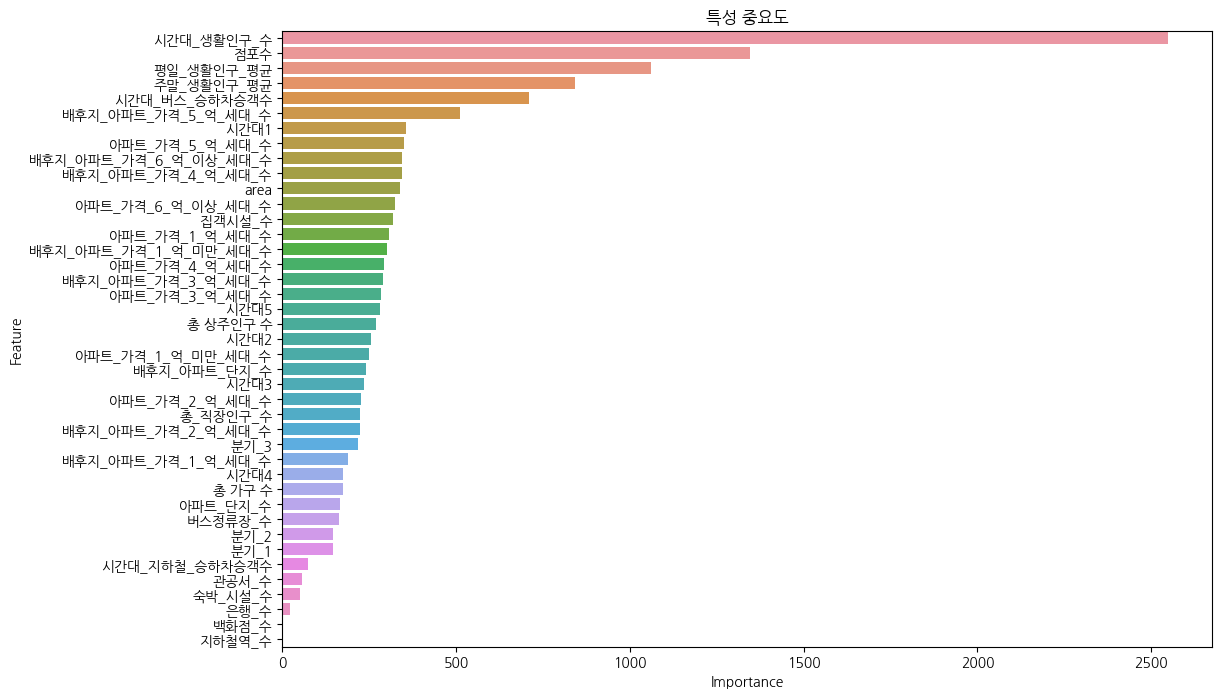

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 2: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 3: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 4: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 5: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 6: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 7: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate'

In [13]:
#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '시간대_생활인구_수', 
        '평일_생활인구_평균', '주말_생활인구_평균', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수']

X = data3[features]
y = data3['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 10
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

In [14]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2293 non-null   int64  
 1   매출                      2293 non-null   float64
 2   기준_년_코드                 2293 non-null   int64  
 3   상권_구분_코드_명              2293 non-null   object 
 4   상권_코드                   2293 non-null   int64  
 5   상권_코드_명                 2293 non-null   object 
 6   시간대1                    2293 non-null   int64  
 7   시간대2                    2293 non-null   int64  
 8   시간대3                    2293 non-null   int64  
 9   시간대4                    2293 non-null   int64  
 10  시간대5                    2293 non-null   int64  
 11  분기_1                    2293 non-null   int64  
 12  분기_2                    2293 non-null   int64  
 13  분기_3                    2293 non-null   int64  
 14  area                    2293 non-null   